# QUESTION 1

In [ ]:
import numpy as np
import math

## Problem 5 of Assignment 1

### Preparing Dataset

In [ ]:
#below where the file is in gdrive, change with your
data_path = "/content/drive/MyDrive/Colab Notebooks/PRNN_A1/Prnn_datasets/"
dataset = np.loadtxt(data_path + 'PCA_MNIST.csv', delimiter=',',skiprows=1)

In [ ]:
dataset.shape

(60000, 11)

In [ ]:
# Normalising dataset needed to prevent exponent going to zero
for i in range(1,dataset.shape[1]):
  dataset[:,i] = (dataset[:,i]-dataset[:,i].min())/(dataset[:,i].max()-dataset[:,i].min())

In [ ]:
count = 40000
X_train = dataset[0:count,1:]
Y_train =dataset[0:count,0]
X_test = dataset[count:,1:]
Y_test = dataset[count:,0]

In [ ]:
classes = 10

In [ ]:
train_dataset = dataset[0:40000,:]
test_dataset = dataset[40000:,:]

### Creating Trees with entropy

Both train and test Dataset should contain first column as class
Each column should be normalised

In [ ]:
class node():
  def __init__(self, value,feature,left,right,leaf,depth,cls):
    self.value = value
    self.left = left
    self.right = right
    self.depth = depth
    self.leaf = leaf
    self.feature = feature
    self.cls  = cls 

In [ ]:
def entropy(D):
  sum = 0
  x = np.unique(D[:,0])
  for i in range(x.shape[0]):
    d = D[D[:,0]==x[i]]
    p = d.shape[0]/D.shape[0]
    temp = p * math.log(p)
    sum =sum + temp
  sum = -sum
  return(sum)

In [ ]:
def maj(D):
  x = np.unique(D[:,0])
  max_cls = 0
  max_count = 0
  for i in range(x.shape[0]):
    d = D[D[:,0]==x[i]]
    if(max_count<d.shape[0]):
      max_count = d.shape[0]
      max_cls = x[i]
  return(max_cls)

In [ ]:
def perc_maj_cls(D):
  x = np.unique(D[:,0])
  max_cls = 0
  max_count = 0
  for i in range(x.shape[0]):
    d = D[D[:,0]==x[i]]
    if(max_count<d.shape[0]):
      max_count = d.shape[0]
      max_cls = x[i]
  if(max_count/D.shape[0] >0.95):
    return(max_cls)
  else:
    return(-1)

In [ ]:
def grow_trees_entropy(D,depth,k): # k is max depth
  if(depth>=k or D.shape[0]==0):          # user defined depth
    return(None)
  cls = perc_maj_cls(D)
  if(cls!=-1):
    return(node(0,0,None,None,1,depth,cls))
  ent = -1
  featur=0
  value=0
  for features in range(1,D.shape[1]): # first column is ans
    # d = D[:,features]
    # d = np.unique(d)                 # commented code necessary if want to check for each datapoint
    # d = np.sort(d)
    for i in range(1,100):
      d1 = D[D[:,features]<i/100]
      d2 = D[D[:,features]>=i/100]
      p1 = d1.shape[0]/D.shape[0]
      p2 = d2.shape[0]/D.shape[0]
      entropy_split = p1 * entropy(d1)+ p2*entropy(d2)
      if(entropy_split<ent or ent==-1):
        featur = features
        value = i/100
        D1 = d1
        D2 = d2
        ent =entropy_split
  left = grow_trees_entropy(D1,depth+1,k)
  right = grow_trees_entropy(D2,depth+1,k)
  leaf = 0
  if left==None and right == None:
    cls = maj(D)
    leaf = 1
  else:
    cls = -1
  return(node(value,featur,left,right,leaf,depth,cls))

In [ ]:
def run_decision_tree(D,root):
  y=np.zeros(D.shape[0])
  for i in range(D.shape[0]):
    nd =root
    while(1):
      if nd.leaf ==1:
        y[i] = nd.cls
        break
      if(D[i][nd.feature]<nd.value):
        nd = nd.left
      else:
        nd = nd.right
  return(y)

In [ ]:
def print_tree(nd):
  print(nd.value,nd.feature,nd.depth,nd.leaf)
  if(nd.left!=None):
    print_tree(nd.left)
  if(nd.right!=None):
    print_tree(nd.right)

#### Depth - 20 trees

In [ ]:
 root = grow_trees_entropy(train_dataset,0,20)

In [ ]:
print_tree(root)

In [ ]:
y = run_decision_tree(train_dataset,root)

In [ ]:
acc = np.sum(y==train_dataset[:,0])/train_dataset.shape[0]
print('train accuracy is ', acc*100)

train accuracy is  97.48750000000001


In [ ]:
y = run_decision_tree(test_dataset,root)
acc = np.sum(y==test_dataset[:,0])/test_dataset.shape[0]
print('test accuracy is ', acc*100)

test accuracy is  92.19000000000001


In [ ]:
conf_matrix = np.zeros((classes,classes))
for i in range(y.shape[0]):
    conf_matrix[int(y[i])][int(test_dataset[i][0])]+=1

In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
precision = []
recall = []
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))
  precision.append(TP[i]/(TP[i]+FP[i]))
  recall.append(TP[i]/(TP[i]+FN[i]))
print('F1 scores for corresponding classes are:')
print(F1)
print(precision)
print(recall)

F1 scores for corresponding classes are:
[0.9219330855018587, 0.9213139801375095, 0.9588497768963807, 0.9206110693713999, 0.9434055118110236, 0.9097381133994407, 0.8936918823825082, 0.8509036144578314, 0.9514943655071043, 0.9453262786596119]
[0.914004914004914, 0.9387649195640893, 0.9508357915437562, 0.9222277972905168, 0.9287790697674418, 0.925504397309881, 0.898433552299141, 0.8543346774193549, 0.9327569644572526, 0.9527679024885729]
[0.93, 0.9045, 0.967, 0.919, 0.9585, 0.8945, 0.889, 0.8475, 0.971, 0.938]


#### Depth - 10 trees

In [ ]:
 root = grow_trees_entropy(train_dataset,0,10)

In [ ]:
print_tree(root)

In [ ]:
y = run_decision_tree(train_dataset,root)

In [ ]:
acc = np.sum(y==train_dataset[:,0])/train_dataset.shape[0]
print('train accuracy is ', acc*100)

train accuracy is  89.58749999999999


In [ ]:
y = run_decision_tree(test_dataset,root)
acc = np.sum(y==test_dataset[:,0])/test_dataset.shape[0]
print('test accuracy is ', acc*100)

test accuracy is  90.705


In [ ]:
conf_matrix = np.zeros((classes,classes))
for i in range(y.shape[0]):
    conf_matrix[int(y[i])][int(test_dataset[i][0])]+=1

In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
precision = []
recall = []
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))
  precision.append(TP[i]/(TP[i]+FP[i]))
  recall.append(TP[i]/(TP[i]+FN[i]))
print('F1 scores for corresponding classes are:')
print(F1)
print(precision)
print(recall)

F1 scores for corresponding classes are:
[0.8902805611222445, 0.8923154701718908, 0.9572606848287928, 0.9162011173184358, 0.9311023622047244, 0.8896373056994819, 0.8865735259294341, 0.8443017656500803, 0.9167464114832536, 0.9423623675368312]
[0.8920682730923695, 0.9023517382413088, 0.9570214892553723, 0.8908833254605574, 0.9166666666666666, 0.9231182795698925, 0.8421052631578947, 0.9079401611047181, 0.8788990825688073, 0.9753879079721777]
[0.8885, 0.8825, 0.9575, 0.943, 0.946, 0.8585, 0.936, 0.789, 0.958, 0.9115]


### Creating Trees with gini index

In [ ]:
def gini_index(D):
  sum = 0
  x = np.unique(D[:,0])
  for i in range(x.shape[0]):
    d = D[D[:,0]==x[i]]
    p = d.shape[0]/D.shape[0]
    sum =sum + p*(1-p)
  return(sum)

In [ ]:
def grow_trees_gini(D,depth,k): # k is max depth
  if(depth>=k or D.shape[0]==0):          # user defined depth
    return(None)
  cls = perc_maj_cls(D)
  if(cls!=-1):
    return(node(0,0,None,None,1,depth,cls))
  ent = -1
  featur=0
  value=0
  for features in range(1,D.shape[1]): # first column is ans
    # d = D[:,features]
    # d = np.unique(d)                 # commented code necessary if want to check for each datapoint
    # d = np.sort(d)
    for i in range(1,100):
      d1 = D[D[:,features]<i/100]
      d2 = D[D[:,features]>=i/100]
      p1 = d1.shape[0]/D.shape[0]
      p2 = d2.shape[0]/D.shape[0]
      gini_split = p1 * gini_index(d1)+ p2*gini_index(d2)
      if(gini_split<ent or ent==-1):
        featur = features
        value = i/100
        D1 = d1
        D2 = d2
        ent =gini_split
  left = grow_trees_gini(D1,depth+1,k)
  right = grow_trees_gini(D2,depth+1,k)
  leaf = 0
  if left==None and right == None:
    cls = maj(D)
    leaf = 1
  else:
    cls = -1
  return(node(value,featur,left,right,leaf,depth,cls))

#### Depth 20 trees

In [ ]:
 root = grow_trees_gini(train_dataset,0,20)

In [ ]:
y = run_decision_tree(train_dataset,root)

In [ ]:
acc = np.sum(y==train_dataset[:,0])/train_dataset.shape[0]
print('train accuracy is ', acc*100)

train accuracy is  96.93


In [ ]:
y = run_decision_tree(test_dataset,root)
acc = np.sum(y==test_dataset[:,0])/test_dataset.shape[0]
print('test accuracy is ', acc*100)

test accuracy is  91.995


In [ ]:
conf_matrix = np.zeros((classes,classes))
for i in range(y.shape[0]):
    conf_matrix[int(y[i])][int(test_dataset[i][0])]+=1

In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
precision = []
recall = []
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))
  precision.append(TP[i]/(TP[i]+FP[i]))
  recall.append(TP[i]/(TP[i]+FN[i]))
print('F1 scores for corresponding classes are:')
print(F1)
print(precision)
print(recall)

F1 scores for corresponding classes are:
[0.9104367135455218, 0.9164102564102564, 0.9527812113720643, 0.9196897673254941, 0.9539686489176412, 0.9129435792698494, 0.8897755610972569, 0.8587257617728532, 0.9421167352869945, 0.9411467542308664]
[0.8986848514369216, 0.9405263157894737, 0.9422982885085575, 0.9203805708562844, 0.9494799405646359, 0.9327073552425665, 0.8875621890547264, 0.8650431253170979, 0.9135744480976985, 0.9509954058192955]
[0.9225, 0.8935, 0.9635, 0.919, 0.9585, 0.894, 0.892, 0.8525, 0.9725, 0.9315]


#### Depth 10 trees

In [ ]:
 root = grow_trees_gini(train_dataset,0,10)

In [ ]:
y = run_decision_tree(train_dataset,root)

In [ ]:
acc = np.sum(y==train_dataset[:,0])/train_dataset.shape[0]
print('train accuracy is ', acc*100)

train accuracy is  89.35


In [ ]:
y = run_decision_tree(test_dataset,root)
acc = np.sum(y==test_dataset[:,0])/test_dataset.shape[0]
print('test accuracy is ', acc*100)

test accuracy is  90.215


In [ ]:
conf_matrix = np.zeros((classes,classes))
for i in range(y.shape[0]):
    conf_matrix[int(y[i])][int(test_dataset[i][0])]+=1

In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
precision = []
recall = []
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))
  precision.append(TP[i]/(TP[i]+FP[i]))
  recall.append(TP[i]/(TP[i]+FN[i]))
print('F1 scores for corresponding classes are:')
print(F1)
print(precision)
print(recall)

F1 scores for corresponding classes are:
[0.8929362539995077, 0.8915478615071283, 0.9503403075371818, 0.907411907654921, 0.9314385440039891, 0.8641722193746797, 0.8865318204242724, 0.8591909882232462, 0.9095619406500236, 0.9275210084033614]
[0.8793019873969947, 0.908195020746888, 0.958312150482969, 0.88274231678487, 0.9288910989557434, 0.886435331230284, 0.8748782862706913, 0.8803777544596013, 0.8597506678539626, 0.9767699115044248]
[0.907, 0.8755, 0.9425, 0.9335, 0.934, 0.843, 0.8985, 0.839, 0.9655, 0.883]


## Applying same for problem 3 A1

Both train and test Dataset should contain first column as class
Each column should be normalised

In [ ]:
#below where the file is in gdrive, change with your
data_path = "/content/drive/MyDrive/Prnn/"
train_dataset_3 = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/PRNN_A1/Prnn_datasets/p3_train.csv', delimiter=',')
test_dataset_3 = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/PRNN_A1/Prnn_datasets/p3_test.csv', delimiter=',')

In [ ]:
x = train_dataset_3[:,:10]
for i in range(x.shape[1]):
  x[:,i] = (x[:,i]-x[:,i].min())/(x[:,i].max()-x[:,i].min())

In [ ]:
train_dataset_3 = np.column_stack((train_dataset_3[:,10],x))

In [ ]:
x = test_dataset_3[:,:10]
for i in range(x.shape[1]):
  x[:,i] = (x[:,i]-x[:,i].min())/(x[:,i].max()-x[:,i].min())

In [ ]:
test_dataset_3 = np.column_stack((test_dataset_3[:,10],x))

In [ ]:
classes = 5

### Gini impurity

#### Depth 20 trees

In [ ]:
 root = grow_trees_gini(train_dataset_3,0,20)

In [ ]:
y = run_decision_tree(train_dataset_3,root)

In [ ]:
acc = np.sum(y==train_dataset_3[:,0])/train_dataset_3.shape[0]
print('train accuracy is ', acc*100)

train accuracy is  74.45


In [ ]:
y = run_decision_tree(test_dataset_3,root)
acc = np.sum(y==test_dataset_3[:,0])/test_dataset_3.shape[0]
print('test accuracy is ', acc*100)

test accuracy is  50.88666666666667


In [ ]:
conf_matrix = np.zeros((classes,classes))
for i in range(y.shape[0]):
    conf_matrix[int(y[i]-1)][int(test_dataset_3[i][0]-1)]+=1

In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
precision = []
recall = []
for i in range(classes-1):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))
  precision.append(TP[i]/(TP[i]+FP[i]))
  recall.append(TP[i]/(TP[i]+FN[i]))
print('F1 scores for corresponding classes are:')
print(F1)
print(precision)
print(recall)

F1 scores for corresponding classes are:
[0.47767857142857145, 0.5031621163041802, 0.5374382364120106, 0.5235675486244963]
[0.42811416377700723, 0.4657338663620788, 0.6363636363636364, 0.5468521229868228]
[0.5402221474251094, 0.5471318349547132, 0.4651315789473684, 0.5021848739495798]


#### Depth 10 trees

In [ ]:
 root = grow_trees_gini(train_dataset_3,0,10)

In [ ]:
y = run_decision_tree(train_dataset_3,root)

In [ ]:
acc = np.sum(y==train_dataset_3[:,0])/train_dataset_3.shape[0]
print('train accuracy is ', acc*100)

train accuracy is  56.394999999999996


In [ ]:
y = run_decision_tree(test_dataset_3,root)
acc = np.sum(y==test_dataset_3[:,0])/test_dataset_3.shape[0]
print('test accuracy is ', acc*100)

test accuracy is  54.24


In [ ]:
conf_matrix = np.zeros((classes,classes))
for i in range(y.shape[0]):
    conf_matrix[int(y[i]-1)][int(test_dataset_3[i][0]-1)]+=1

In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
precision = []
recall = []
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))
  precision.append(TP[i]/(TP[i]+FP[i]))
  recall.append(TP[i]/(TP[i]+FN[i]))
print('F1 scores for corresponding classes are:')
print(F1)
print(precision)
print(recall)

F1 scores for corresponding classes are:
[0.4808840340403912, 0.5429642915375835, 0.5766062602965404, 0.573866868955054, 0.5677749360613811]
[0.38616891064871484, 0.5282360406091371, 0.7709251101321586, 0.6583986074847694, 0.5879237288135594]
[0.6371592056546618, 0.5585374035558538, 0.4605263157894737, 0.5085714285714286, 0.5489614243323442]


### Entropy

#### Depth 20 trees

In [ ]:
 root = grow_trees_entropy(train_dataset_3,0,20)

In [ ]:
y = run_decision_tree(train_dataset_3,root)

In [ ]:
acc = np.sum(y==train_dataset_3[:,0])/train_dataset_3.shape[0]
print('train accuracy is ', acc*100)

train accuracy is  79.38499999999999


In [ ]:
y = run_decision_tree(test_dataset_3,root)
acc = np.sum(y==test_dataset_3[:,0])/test_dataset_3.shape[0]
print('test accuracy is ', acc*100)

test accuracy is  48.906666666666666


In [ ]:
conf_matrix = np.zeros((classes,classes))
for i in range(y.shape[0]):
    conf_matrix[int(y[i]-1)][int(test_dataset_3[i][0]-1)]+=1

In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
precision = []
recall = []
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))
  precision.append(TP[i]/(TP[i]+FP[i]))
  recall.append(TP[i]/(TP[i]+FN[i]))
print('F1 scores for corresponding classes are:')
print(F1)
print(precision)
print(recall)

F1 scores for corresponding classes are:
[0.4479691669137267, 0.4848768319301528, 0.5231638418079096, 0.4987757957327737, 0.5006882312456985]
[0.4002649006622517, 0.45295659772793473, 0.6118942731277534, 0.5198687568355814, 0.5235696293630803]
[0.5085829686974083, 0.5216370345521637, 0.4569078947368421, 0.479327731092437, 0.4797230464886251]


#### depth 10 trees

In [ ]:
 root = grow_trees_entropy(train_dataset_3,0,10)

In [ ]:
y = run_decision_tree(train_dataset_3,root)

In [ ]:
acc = np.sum(y==train_dataset_3[:,0])/train_dataset_3.shape[0]
print('train accuracy is ', acc*100)

train accuracy is  56.48333333333333


In [ ]:
y = run_decision_tree(test_dataset_3,root)
acc = np.sum(y==test_dataset_3[:,0])/test_dataset_3.shape[0]
print('test accuracy is ', acc*100)

test accuracy is  55.26


In [ ]:
conf_matrix = np.zeros((classes,classes))
for i in range(y.shape[0]):
    conf_matrix[int(y[i]-1)][int(test_dataset_3[i][0]-1)]+=1

In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
precision = []
recall = []
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))
  precision.append(TP[i]/(TP[i]+FP[i]))
  recall.append(TP[i]/(TP[i]+FN[i]))
print('F1 scores for corresponding classes are:')
print(F1)
print(precision)
print(recall)

F1 scores for corresponding classes are:
[0.49687195884888086, 0.554021121039805, 0.5900097943192948, 0.5725776965265083, 0.5677143327299654]
[0.42325911890099477, 0.537177063642092, 0.7292978208232446, 0.6276553106212425, 0.566688567674113]
[0.6014809828340626, 0.5719557195571956, 0.4953947368421053, 0.5263865546218487, 0.5687438180019783]


# QUESTION 2

In [ ]:
import numpy as np
import math

### Preparing Dataset

In [ ]:
#below where the file is in gdrive, change with your
data_path = "/content/drive/MyDrive/Colab Notebooks/PRNN_A1/Prnn_datasets/"
dataset = np.loadtxt(data_path + 'PCA_MNIST.csv', delimiter=',',skiprows=1)

In [ ]:
dataset.shape

(60000, 11)

In [ ]:
# Normalising dataset needed to prevent exponent going to zero
for i in range(1,dataset.shape[1]):
  dataset[:,i] = (dataset[:,i]-dataset[:,i].min())/(dataset[:,i].max()-dataset[:,i].min())

In [ ]:
count = 40000
X_train = dataset[0:count,1:]
Y_train =dataset[0:count,0]
X_test = dataset[count:,1:]
Y_test = dataset[count:,0]

In [ ]:
classes = 10

In [ ]:
train_dataset = dataset[0:40000,:]
test_dataset = dataset[40000:,:]

## Creating Trees

 DATA FORMAT - Both train and test Dataset should contain first column as class
Each column should be normalised

In [ ]:
class node():
  def __init__(self, value,feature,left,right,leaf,depth,cls):
    self.value = value
    self.left = left
    self.right = right
    self.depth = depth
    self.leaf = leaf
    self.feature = feature
    self.cls  = cls 

In [ ]:
def entropy(D):
  sum = 0
  x = np.unique(D[:,0])
  for i in range(x.shape[0]):
    d = D[D[:,0]==x[i]]
    p = d.shape[0]/D.shape[0]
    temp = p * math.log(p)
    sum =sum + temp
  sum = -sum
  return(sum)

In [ ]:
def maj(D):
  x = np.unique(D[:,0])
  max_cls = 0
  max_count = 0
  for i in range(x.shape[0]):
    d = D[D[:,0]==x[i]]
    if(max_count<d.shape[0]):
      max_count = d.shape[0]
      max_cls = x[i]
  return(max_cls)

In [ ]:
def perc_maj_cls(D):
  x = np.unique(D[:,0])
  max_cls = 0
  max_count = 0
  for i in range(x.shape[0]):
    d = D[D[:,0]==x[i]]
    if(max_count<d.shape[0]):
      max_count = d.shape[0]
      max_cls = x[i]
  if(max_count/D.shape[0] >0.95):
    return(max_cls)
  else:
    return(-1)

In [ ]:
def grow_trees(D,depth,k): # i is depth, k is max depth
  if(depth>=k or D.shape[0]==0):          # user defined depth
    return(None)
  cls = perc_maj_cls(D)
  if(cls!=-1):
    return(node(0,0,None,None,1,depth,cls))
  ent = -1
  featur=0
  value=0
  for features in range(1,D.shape[1]): # first column is ans
    # d = D[:,features]
    # d = np.unique(d)                 # commented code necessary if want to check for each datapoint
    # d = np.sort(d)
    for i in range(1,100):
      d1 = D[D[:,features]<i/100]
      d2 = D[D[:,features]>=i/100]
      p1 = d1.shape[0]/D.shape[0]
      p2 = d2.shape[0]/D.shape[0]
      entropy_split = p1 * entropy(d1)+ p2*entropy(d2)
      if(entropy_split<ent or ent==-1):
        featur = features
        value = i/100
        D1 = d1
        D2 = d2
        ent =entropy_split
  left = grow_trees(D1,depth+1,k)
  right = grow_trees(D2,depth+1,k)
  leaf = 0
  if left==None and right == None:
    cls = maj(D)
    leaf = 1
  else:
    cls = -1
  return(node(value,featur,left,right,leaf,depth,cls))

In [ ]:
def run_decision_tree(D,root):
  y=np.zeros(D.shape[0])
  for i in range(D.shape[0]):
    nd =root
    while(1):
      if nd.leaf ==1:
        y[i] = nd.cls
        break
      if(D[i][nd.feature]<nd.value):
        nd = nd.left
      else:
        nd = nd.right
  return(y)

In [ ]:
def print_tree(nd):
  print(nd.value,nd.feature,nd.depth,nd.leaf)
  if(nd.left!=None):
    print_tree(nd.left)
  if(nd.right!=None):
    print_tree(nd.right)

In [ ]:
def grow_trees_with_slct_ftr(D,depth,k,indices): # i is depth, k is max depth
  if(depth>=k or D.shape[0]==0):          # user defined depth
    return(None)
  cls = perc_maj_cls(D)
  if(cls!=-1):
    return(node(0,0,None,None,1,depth,cls))
  ent = -1
  featur=0
  value=0
  for features in indices: # first column is ans
    # d = D[:,features]
    # d = np.unique(d)                 # commented code necessary if want to check for each datapoint
    # d = np.sort(d)
    for i in range(1,100):
      d1 = D[D[:,features]<i/100]
      d2 = D[D[:,features]>=i/100]
      p1 = d1.shape[0]/D.shape[0]
      p2 = d2.shape[0]/D.shape[0]
      entropy_split = p1 * entropy(d1)+ p2*entropy(d2)
      if(entropy_split<ent or ent==-1):
        featur = features
        value = i/100
        D1 = d1
        D2 = d2
        ent =entropy_split
  left = grow_trees_with_slct_ftr(D1,depth+1,k,indices)
  right = grow_trees_with_slct_ftr(D2,depth+1,k,indices)
  leaf = 0
  if left==None and right == None:
    cls = maj(D)
    leaf = 1
  else:
    cls = -1
  return(node(value,featur,left,right,leaf,depth,cls))

## Random forest

In [ ]:
# def select_feature(D,d):
#   x = D[:,0]
#   y = D[:,1:]
#   n_features = y.shape[1]
#   indices = np.random.choice(n_features, size=d, replace=False)
#   subset = y[:, indices]
#   y= np.column_stack((x,subset))
#   return(y)

In [ ]:
def random_forest(D,d,t): # D is dataset and d is number of features and t is number of trees
  root=[]
  for i in range(t):
    indices = np.random.choice(len(D), size=D.shape[0], replace=True)
    D_i = D[indices,:]
    #D_i = select_feature(D_i,d)
    a=np.zeros(D_i.shape[1]-1)
    for i in range(1,D_i.shape[1]):
      a[i-1]=i
    a = a.astype(int)
    indices = np.random.choice(a, size=d, replace=False)
    root.append(grow_trees_with_slct_ftr(D_i,0,10,indices))
  return(root)

In [ ]:
def run_random_forest(D,root):
  j=0
  lst = []
  for j in range(len(root)):
    y = run_decision_tree(D,root[j])
    lst.append(y)
  y = np.array(lst)
  ans = np.zeros(D.shape[0])
  for i in range(y.shape[1]): # number of datapoints
    index = np.zeros(10)  # number of classes
    for k in range(y.shape[0]): # number of trees
      index[int(y[k][i])]+=1
    id = np.argmax(index)
    ans[i]=id
  return(ans)

In [ ]:
root = random_forest(train_dataset,5,8)  # returns a list

In [ ]:
len(root)

8

In [ ]:
y = run_random_forest(train_dataset,root)

In [ ]:
acc = np.sum(y==train_dataset[:,0])/train_dataset.shape[0]
print('train accuracy is ', acc*100)

train accuracy is  88.2625


In [ ]:
y = run_random_forest(test_dataset,root)
acc = np.sum(y==test_dataset[:,0])/test_dataset.shape[0]
print('test accuracy is ', acc*100)

test accuracy is  90.39


In [ ]:
classes = 10

In [ ]:
conf_matrix = np.zeros((classes,classes))
for i in range(y.shape[0]):
    conf_matrix[int(y[i])][int(test_dataset[i][0])]+=1

In [ ]:
conf_matrix = conf_matrix.astype('int')

In [ ]:
print(conf_matrix)

[[1798   70   31   18    2    3    0    0   51   10]
 [  76 1785   59   10    3   77    2    0   61    6]
 [  66    9 1893   20    6   20    2   10   12   14]
 [   9   14    3 1892   37   35   22  140    0    9]
 [   7   48    1   16 1894   41    4    6    2   48]
 [   3   35   12   13   36 1814    4    6    9    9]
 [   3    0    0   13    1    0 1871  384    1   12]
 [   1    1    0   18    4    2   93 1454    1   21]
 [  35   33    0    0    3    4    1    0 1851   45]
 [   2    5    1    0   14    4    1    0   12 1826]]


In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
precision = []
recall = []
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))
  precision.append(TP[i]/(TP[i]+FP[i]))
  recall.append(TP[i]/(TP[i]+FN[i]))
print('F1 scores for corresponding classes are:')
print(F1)
print(precision)
print(recall)

F1 scores for corresponding classes are:
[0.902837057494351, 0.8752145133611179, 0.9343534057255676, 0.9093967796202835, 0.9313990656503566, 0.9205785333671657, 0.8732788798133022, 0.8089012517385258, 0.93202416918429, 0.9448900388098318]
[0.9067070095814422, 0.8585858585858586, 0.922514619883041, 0.8755205923183711, 0.9163038219641993, 0.93456980937661, 0.8188183807439825, 0.9115987460815047, 0.9386409736308317, 0.9790884718498659]
[0.899, 0.8925, 0.9465, 0.946, 0.947, 0.907, 0.9355, 0.727, 0.9255, 0.913]


### Varying number of features and plotting

In [ ]:
train_acc=[]
test_acc=[]
index = []
for ind in range(1,10):
  root = random_forest(train_dataset,ind,4)
  y = run_random_forest(train_dataset,root)
  acc = np.sum(y==train_dataset[:,0])/train_dataset.shape[0]
  train_acc.append(acc)
  y = run_random_forest(test_dataset,root)
  acc = np.sum(y==test_dataset[:,0])/test_dataset.shape[0]
  test_acc.append(acc)
  index.append(ind)

In [ ]:
import matplotlib.pyplot as plt

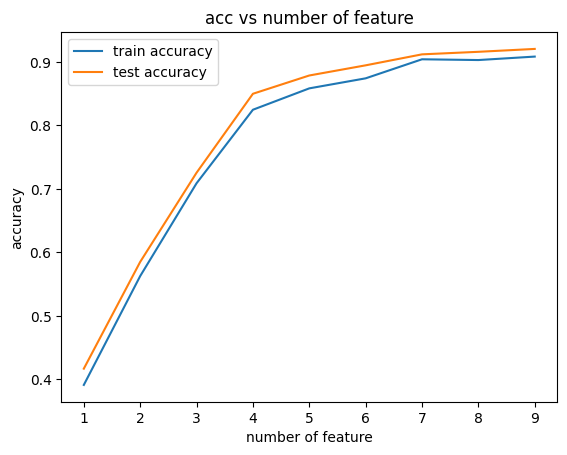

In [ ]:
plt.plot(index,train_acc,label='train accuracy')
plt.plot(index,test_acc,label= 'test accuracy')
plt.title('acc vs number of feature')
plt.xlabel('number of feature')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### varying number of trees and plotting

In [ ]:
train_acc=[]
test_acc=[]
index = []
for ind in range(1,8):
  root = random_forest(train_dataset,5,ind)
  y = run_random_forest(train_dataset,root)
  acc = np.sum(y==train_dataset[:,0])/train_dataset.shape[0]
  print(acc)
  train_acc.append(acc)
  y = run_random_forest(test_dataset,root)
  acc = np.sum(y==test_dataset[:,0])/test_dataset.shape[0]
  test_acc.append(acc)
  index.append(ind)

0.7685
0.786225
0.813225
0.786575
0.8878
0.8686
0.892075


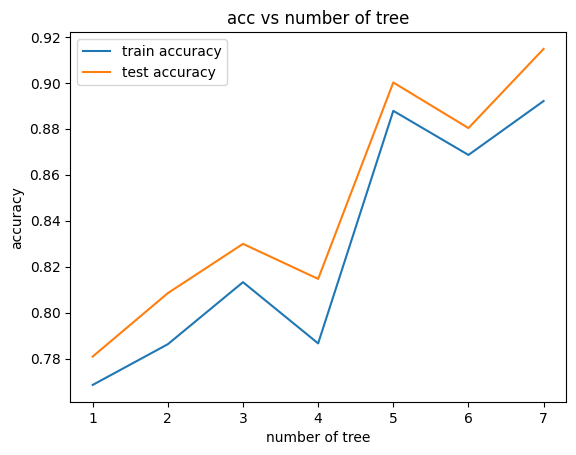

In [ ]:
plt.plot(index,train_acc,label='train accuracy')
plt.plot(index,test_acc,label= 'test accuracy')
plt.title('acc vs number of tree')
plt.xlabel('number of tree')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## For Problem 3 Assignment 1

Both train and test Dataset should contain first column as class
Each column should be normalised

In [ ]:
def run_random_forest_3(D,root):
  j=0
  lst = []
  for j in range(len(root)):
    y = run_decision_tree(D,root[j])
    lst.append(y)
  y = np.array(lst)
  ans = np.zeros(D.shape[0])
  for i in range(y.shape[1]):
    index = np.zeros(10)  # number of classes
    for k in range(y.shape[0]): # number of trees
      index[int(y[k][i])-1]+=1
    id = np.argmax(index)
    ans[i]=id+1
  return(ans)

In [ ]:
#below where the file is in gdrive, change with your
data_path = "/content/drive/MyDrive/Prnn/"
train_dataset_3 = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/PRNN_A1/Prnn_datasets/p3_train.csv', delimiter=',')
test_dataset_3 = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/PRNN_A1/Prnn_datasets/p3_test.csv', delimiter=',')

In [ ]:
x = train_dataset_3[:,:10]
for i in range(x.shape[1]):
  x[:,i] = (x[:,i]-x[:,i].min())/(x[:,i].max()-x[:,i].min())

In [ ]:
train_dataset_3 = np.column_stack((train_dataset_3[:,10],x))

In [ ]:
x = test_dataset_3[:,:10]
for i in range(x.shape[1]):
  x[:,i] = (x[:,i]-x[:,i].min())/(x[:,i].max()-x[:,i].min())

In [ ]:
test_dataset_3 = np.column_stack((test_dataset_3[:,10],x))

In [ ]:
classes = 5

### Training

In [ ]:
root = random_forest(train_dataset_3,5,8)  # returns a list

In [ ]:
y = run_random_forest(train_dataset_3,root)

In [ ]:
acc = np.sum(y==train_dataset_3[:,0])/train_dataset_3.shape[0]
print('train accuracy is ', acc*100)

train accuracy is  51.295


In [ ]:
y = run_random_forest(test_dataset_3,root)
acc = np.sum(y==test_dataset_3[:,0])/test_dataset_3.shape[0]
print('test accuracy is ', acc*100)

test accuracy is  48.92666666666667


In [ ]:
classes =5

In [ ]:
conf_matrix = np.zeros((classes,classes))
for i in range(y.shape[0]):
    conf_matrix[int(y[i]-1)][int(test_dataset_3[i][0]-1)]+=1

In [ ]:
conf_matrix = conf_matrix.astype('int')

In [ ]:
print(conf_matrix)

[[1840  528  641  558  713]
 [ 336 1602  436  378  380]
 [ 294  283 1406  319  372]
 [ 229  270  249 1381  458]
 [ 272  298  308  339 1110]]


In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
precision = []
recall = []
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))
  precision.append(TP[i]/(TP[i]+FP[i]))
  recall.append(TP[i]/(TP[i]+FN[i]))
print('F1 scores for corresponding classes are:')
print(F1)
print(precision)
print(recall)

F1 scores for corresponding classes are:
[0.507516204661426, 0.524128905610993, 0.4921246062303115, 0.49658396260338006, 0.4141791044776119]
[0.42990654205607476, 0.5114942528735632, 0.5258040388930442, 0.5338229609586393, 0.477009024495058]
[0.6193200942443622, 0.5374035558537403, 0.4625, 0.4642016806722689, 0.3659742828882295]


### Varying number of trees and plotting

In [ ]:
train_acc=[]
test_acc=[]
index = []
for ind in range(1,5):
  root = random_forest(train_dataset_3,5,ind)
  y = run_random_forest(train_dataset_3,root)
  acc = np.sum(y==train_dataset_3[:,0])/train_dataset_3.shape[0]
  print(acc)
  train_acc.append(acc)
  y = run_random_forest(test_dataset_3,root)
  acc = np.sum(y==test_dataset_3[:,0])/test_dataset_3.shape[0]
  test_acc.append(acc)
  index.append(ind)

0.47346666666666665
0.4730666666666667
0.44166666666666665
0.48085


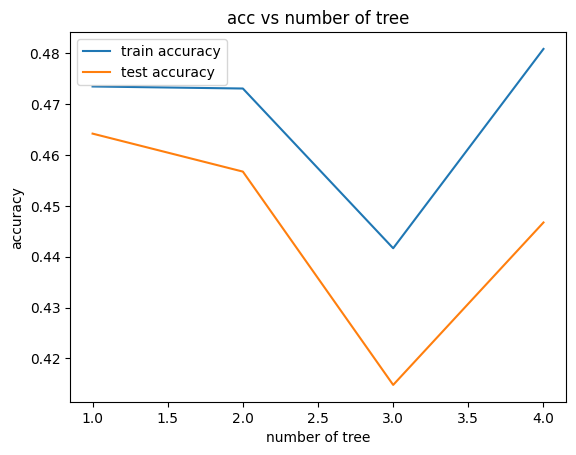

In [ ]:
plt.plot(index,train_acc,label='train accuracy')
plt.plot(index,test_acc,label= 'test accuracy')
plt.title('acc vs number of tree')
plt.xlabel('number of tree')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# QUESTION 3

In [ ]:
import numpy as np
import math

### Preparing Dataset

In [ ]:
#below where the file is in gdrive, change with your
data_path = "/content/drive/MyDrive/"
dataset = np.loadtxt(data_path + 'PCA_MNIST.csv', delimiter=',',skiprows=1)

In [ ]:
dataset.shape

(60000, 11)

In [ ]:
# Normalising dataset needed to prevent exponent going to zero
for i in range(1,dataset.shape[1]):
  dataset[:,i] = (dataset[:,i]-dataset[:,i].min())/(dataset[:,i].max()-dataset[:,i].min())

In [ ]:
classes = 10

In [ ]:
train_dataset = dataset[0:40000,:]
test_dataset = dataset[40000:,:]

## Neural net functions

In [ ]:
class neural_net:
  def __init__(self,input_size,neurons):
    #self.weights = 0.1 * np.ones((input_size,neurons))
    self.weights =  np.random.randn(input_size,neurons)
    self.biases = np.zeros((neurons,1))
  def forward(self,inputs):
    self.inputs = inputs
    self.output = self.weights.T@inputs + self.biases
  def backward(self,dvalues):
    self.dweights = self.inputs@dvalues.T  #gives a matrix
    self.dbiases =  dvalues

    self.dinputs = self.weights@dvalues

In [ ]:
class sigmoid_activation:
  def forward(self,input):
    self.inputs = input
    self.output = 1/(1+np.exp(-input))
  def backward(self,dvalues):
    self.dinputs = dvalues * self.output * (1-self.output)

In [ ]:
class relu_activation:
  def forward(self,input):
    self.inputs = input
    self.output = np.maximum(0,input)
    self.output = np.minimum(self.output,1)
  def backward(self,dvalues):
    self.dinputs = dvalues * np.greater(self.inputs, 0).astype(int)
    self.dinputs = self.dinputs * np.less(self.dinputs, 1).astype(int)

In [ ]:
class softmax_activation:
  def forward(self,input):
    self.input = input
    exp_values = np.exp(input)
    prob = exp_values/(np.sum(exp_values))
    self.output = prob
  def backward(self,dvalues):
    s =dvalues.shape[0]
    jac = np.zeros((s,s))
    for i in range(s):
      for j in range(s):
        k=0
        if i==j:
          k=1
        jac[i][j]= self.output[i][0]*(k-self.output[j][0])  #ddi/dnj
    self.dinputs = jac.T@dvalues

In [ ]:
class grad_des_optimizer:
  def __init__(self,alpha = 0.01):
    self.alpha = alpha
  def store_params(self,layer):
    if not hasattr(layer,'sgd_flag'):
      layer.sgd_flag = 1
      #print("Hi")
      layer.dweight_curr_itr_sum = np.zeros_like(layer.weights)
      layer.dbias_curr_itr_sum = np.zeros_like(layer.biases)

    layer.dweight_curr_itr_sum = layer.dweight_curr_itr_sum + layer.dweights
    layer.dbias_curr_itr_sum = layer.dbias_curr_itr_sum + layer.dbiases
  def update(self,layer,batch_size):
    layer.weights = layer.weights -  self.alpha * layer.dweight_curr_itr_sum/batch_size
    layer.biases = layer.biases -  self.alpha * layer.dbias_curr_itr_sum/batch_size

    layer.dweight_curr_itr_sum = np.zeros_like(layer.weights)
    layer.dbias_curr_itr_sum = np.zeros_like(layer.biases)

In [ ]:
class adam_optimizer:
  def __init__(self,alpha = 0.01,beta_1=0.9,beta_2=0.9):
    self.alpha = alpha
    self.beta_1 = beta_1
    self.beta_2 = beta_2
  def store_params(self,layer):
    if not hasattr(layer,'adam_flag'):
      layer.adam_flag=1
      layer.dweight_sum = np.zeros_like(layer.weights)
      layer.dbias_sum = np.zeros_like(layer.biases)
      layer.dweight_sq_sum = np.zeros_like(layer.weights)
      layer.dbias_sq_sum = np.zeros_like(layer.biases)

      layer.dweight_curr_itr_sum = np.zeros_like(layer.weights)
      layer.dbias_curr_itr_sum = np.zeros_like(layer.biases)

    layer.dweight_sum = self.beta_1*layer.dweight_sum+(1-self.beta_1)*layer.dweights
    layer.dbias_sum =  self.beta_1*layer.dbias_sum+(1-self.beta_1)*layer.dbiases
    layer.dweight_sq_sum = self.beta_2*layer.dweight_sq_sum+(1-self.beta_2)*layer.dweights**2
    layer.dbias_sq_sum =  self.beta_2*layer.dbias_sq_sum+(1-self.beta_2)*layer.dbiases**2
    layer.dweight_curr_itr_sum = layer.dweight_curr_itr_sum + layer.dweights
    layer.dbias_sq_sum = layer.dbias_sq_sum + layer.dbiases
  def update(self,layer,batch_size):
    layer.weights = layer.weights -  self.alpha* layer.dweight_curr_itr_sum/batch_size
    layer.biases = layer.biases -  self.alpha * layer.dbias_curr_itr_sum/batch_size

    layer.dweight_curr_itr_sum = np.zeros_like(layer.weights)
    layer.dbias_curr_itr_sum = np.zeros_like(layer.biases)

## Tree functions

 DATA FORMAT - Both train and test Dataset should contain first column as class
Each column should be normalised

In [ ]:
class node():
  def __init__(self, value,feature,left,right,leaf,depth,cls):
    self.value = value
    self.left = left
    self.right = right
    self.depth = depth
    self.leaf = leaf
    self.feature = feature
    self.cls  = cls 

In [ ]:
def entropy(D):
  sum = 0
  x = np.unique(D[:,0])
  for i in range(x.shape[0]):
    d = D[D[:,0]==x[i]]
    p = d.shape[0]/D.shape[0]
    temp = p * math.log(p)
    sum =sum + temp
  sum = -sum
  return(sum)

In [ ]:
def maj(D):
  x = np.unique(D[:,0])
  max_cls = 0
  max_count = 0
  for i in range(x.shape[0]):
    d = D[D[:,0]==x[i]]
    if(max_count<d.shape[0]):
      max_count = d.shape[0]
      max_cls = x[i]
  return(max_cls)

In [ ]:
def perc_maj_cls(D):
  x = np.unique(D[:,0])
  max_cls = 0
  max_count = 0
  for i in range(x.shape[0]):
    d = D[D[:,0]==x[i]]
    if(max_count<d.shape[0]):
      max_count = d.shape[0]
      max_cls = x[i]
  if(max_count/D.shape[0] >0.95):
    return(max_cls)
  else:
    return(-1)

In [ ]:
def grow_trees(D,depth,k): # i is depth, k is max depth
  if(depth>=k or D.shape[0]==0):          # user defined depth
    return(None)
  cls = perc_maj_cls(D)
  if(cls!=-1):
    return(node(0,0,None,None,1,depth,cls))
  ent = -1
  featur=0
  value=0
  for features in range(1,D.shape[1]): # first column is ans
    # d = D[:,features]
    # d = np.unique(d)                 # commented code necessary if want to check for each datapoint
    # d = np.sort(d)
    for i in range(1,100):
      d1 = D[D[:,features]<i/100]
      d2 = D[D[:,features]>=i/100]
      p1 = d1.shape[0]/D.shape[0]
      p2 = d2.shape[0]/D.shape[0]
      entropy_split = p1 * entropy(d1)+ p2*entropy(d2)
      if(entropy_split<ent or ent==-1):
        featur = features
        value = i/100
        D1 = d1
        D2 = d2
        ent =entropy_split
  left = grow_trees(D1,depth+1,k)
  right = grow_trees(D2,depth+1,k)
  leaf = 0
  if left==None and right == None:
    cls = maj(D)
    leaf = 1
  else:
    cls = -1
  return(node(value,featur,left,right,leaf,depth,cls))

In [ ]:
def run_decision_tree(D,root):
  y=np.zeros(D.shape[0])
  for i in range(D.shape[0]):
    nd =root
    while(1):
      if nd.leaf ==1:
        y[i] = nd.cls
        break
      if(D[i][nd.feature]<nd.value):
        nd = nd.left
      else:
        nd = nd.right
  return(y)

In [ ]:
def print_tree(nd):
  print(nd.value,nd.feature,nd.depth,nd.leaf)
  if(nd.left!=None):
    print_tree(nd.left)
  if(nd.right!=None):
    print_tree(nd.right)

## Adaboost

In [ ]:
def tree_classifier(d):
  y_ret= -1*np.ones((d.shape[0],1))
  root = grow_trees(d,0,5)
  def tree_model(x):
    x = x.reshape((1,x.shape[0]))
    x= np.column_stack((0,x)) # stacking a random number to make it compatible to run tree code
    y = run_decision_tree(x,root)
    return(y[0])
  y_pred = run_decision_tree(d,root)
  for i in range(y_pred.shape[0]):
    if int(y_pred[i])==int(d[i][0]):
      y_ret[i][0]=1
  return(tree_model,y_ret)

In [ ]:
def nn_classifier(d):

  count = 40000
  X_train = d[0:count,1:]
  Y_train = d[0:count,0]
  X_test =  d[count:,1:]
  Y_test =  d[count:,0]


  adam_opt = adam_optimizer()
  layer1 = neural_net(10,25)
  act1 = sigmoid_activation()
  layer2 = neural_net(25,10)

  #Training
  nb = 1  #batch size
  for epochs in range(2):
    loss = 0
    for i in range(X_train.shape[0]):

      x=X_train[i,:]
      y = Y_train[i]
      x = x.reshape((x.shape[0],1))
      yl = np.zeros((classes,1))          # y is label
      yl[int(y)][0]=1

      layer1.forward(x)    # x is feature vector
      act1.forward(layer1.output)
      layer2.forward(act1.output)
      pred = layer2.output

      
      loss = loss+np.linalg.norm(pred-yl)
      dinput_l = (pred-yl)     # Check the sign here else will diverge

      layer2.backward(dinput_l)
      adam_opt.store_params(layer2)

      act1.backward(layer2.dinputs)

      layer1.backward(act1.dinputs)
      adam_opt.store_params(layer1)

      if(i%nb==0):
        adam_opt.update(layer2,nb)
        adam_opt.update(layer1,nb)

    print(loss)

  # finding y to give back
  count = 0
  i=0
  y_ret= -1*np.ones((Y_train.shape[0],1))
  for i in range(X_train.shape[0]):
    x = X_train[i,:]
    y = Y_train[i]
    x = x.reshape((x.shape[0],1))
    yl = np.zeros((classes,1))          # y is label
    yl[int(y)][0]=1

    layer1.forward(x)    # x is feature vector
    act1.forward(layer1.output)
    layer2.forward(act1.output)
    pred = layer2.output

    if np.argmax(pred)==int(y):
      y_ret[i][0]=1

    #k = np.argmax(pred)
  
  def nn_model(x):      
    x = x.reshape((x.shape[0],1))
    layer1.forward(x)    # x is a single data point
    act1.forward(layer1.output)
    layer2.forward(act1.output)
    pred = layer2.output
    return(np.argmax(pred))  # assuming class index starts from 0 returns predicted class of a data point
  return nn_model,y_ret

In [ ]:
def adaboost(D,weight,classifier):
  indices = np.random.choice(len(D),size = D.shape[0],p=weight,replace = True)
  D = D[indices,:]
  model,y = classifier(D)     # Training my model and returning a model, y has +1 or -1
  zeta = np.sum(weight[y[:,0]==-1])
  alpha = 0.5*np.log((1-zeta)/zeta)
  for i in range(weight.shape[0]):
    weight[i] = weight[i]*math.exp(-1*alpha*y[i])
  weight = weight/np.sum(weight)
  return weight,model,alpha

In [ ]:
def run_adaboost(models,alphas,x): # x is a datapoint
  output = np.zeros(classes)
  for i in range(len(models)):
    ind = int(models[i](x))
    output[ind]=output[ind]+alphas[i]
  return(np.argmax(output))

### Building Models

In [ ]:
weight = np.ones(train_dataset.shape[0])/train_dataset.shape[0]

In [ ]:
weight,model1,alpha1 = adaboost(train_dataset,weight,nn_classifier)

29991.59570742504
26106.09087725196


In [ ]:
weight,model2,alpha2 = adaboost(train_dataset,weight,nn_classifier)

29565.83981476936
23878.5109407035


In [ ]:
models=[]
alphas=[]
models.append(model1)
models.append(model2)
alphas.append(alpha1)
alphas.append(alpha2)

## Testing on dataset

In [ ]:
count = 0
for i in range(test_dataset.shape[0]):
  x = test_dataset[i,1:]
  y_real = test_dataset[i,0]
  y_pred = run_adaboost(models,alphas,x)
  if(y_pred == int(y_real)):
    count+=1


In [ ]:
count/test_dataset.shape[0]

0.88145

## increase number of models and observe accuracy

In [ ]:
def model_error(models,alphas,D):
  count = 0
  err = 0
  for i in range(D.shape[0]):
    x = D[i,1:]
    y_real = D[i,0]
    y_pred = run_adaboost(models,alphas,x)
    if(y_pred == int(y_real)):
      count+=1
      z=1
    else:
      z=-1
    err = err + math.exp(-1*z) 
  return(err,count)

### 4 models

In [ ]:
weight = np.ones(train_dataset.shape[0])/train_dataset.shape[0]

In [ ]:
weight,model1,alpha1 = adaboost(train_dataset,weight,tree_classifier)

In [ ]:
train_error=[]
test_error=[]
models=[]
alphas=[]
models.append(model1)
alphas.append(alpha1)

In [ ]:
train_err,train_count = model_error(models,alphas,train_dataset)
test_err,test_count = model_error(models,alphas,test_dataset)
train_error.append(train_err)
test_error.append(test_err)


In [ ]:
weight,model2,alpha2 = adaboost(train_dataset,weight,tree_classifier)

In [ ]:
models.append(model2)
alphas.append(alpha2)

In [ ]:
train_err,train_count = model_error(models,alphas,train_dataset)
test_err,test_count = model_error(models,alphas,test_dataset)
train_error.append(train_err)
test_error.append(test_err)

In [ ]:
weight,model3,alpha3 = adaboost(train_dataset,weight,tree_classifier)

In [ ]:
models.append(model3)
alphas.append(alpha3)

In [ ]:
train_err,train_count = model_error(models,alphas,train_dataset)
test_err,test_count = model_error(models,alphas,test_dataset)
train_error.append(train_err)
test_error.append(test_err)

In [ ]:
weight,model4,alpha4 = adaboost(train_dataset,weight,nn_classifier)

28633.140944644965
25638.77431889461


In [ ]:
models.append(model4)
alphas.append(alpha4)

In [ ]:
train_err,train_count = model_error(models,alphas,train_dataset)
test_err,test_count = model_error(models,alphas,test_dataset)
train_error.append(train_err)
test_error.append(test_err)

In [ ]:
index=[1,2,3,4]

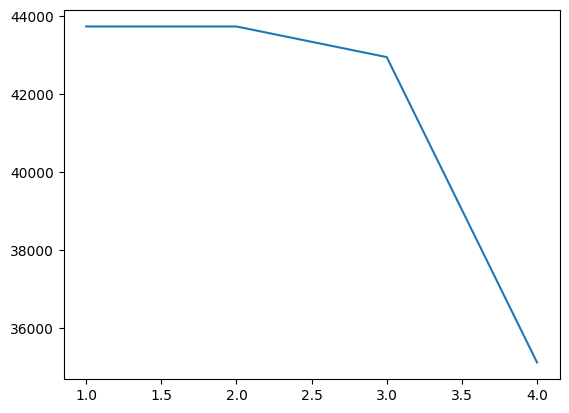

In [ ]:
plt.plot(index,train_error)

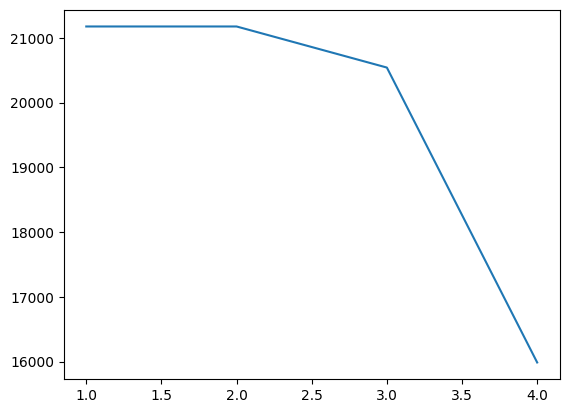

In [ ]:
plt.plot(index,test_error)

### 15 models tree

In [ ]:
train_error=[]
index=[]
train_accuracy=[]
test_error=[]
test_accuracy=[]
train_count_er=[]
test_count_er=[]
models=[]
alphas=[]
for i in range(15):
  weight,model,alpha = adaboost(train_dataset,weight,tree_classifier)
  models.append(model)
  alphas.append(alpha)
  train_err,train_count = model_error(models,alphas,train_dataset)
  test_err,test_count = model_error(models,alphas,test_dataset)
  index.append(i)
  train_error.append(train_err)
  train_accuracy.append(train_count/train_dataset.shape[0])
  test_error.append(test_err)
  test_accuracy.append(test_count/test_dataset.shape[0])
  train_count_er.append(train_dataset.shape[0]-train_count)
  test_count_er.append(test_dataset.shape[0]-test_count)

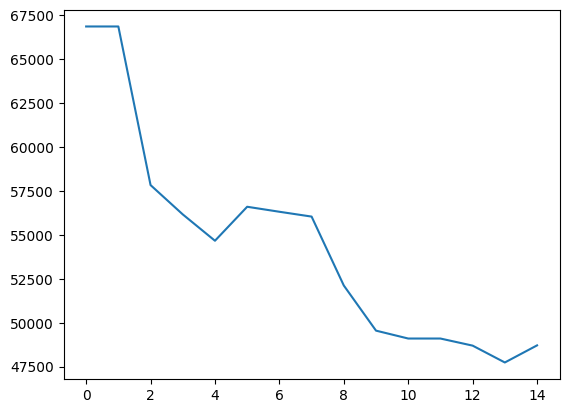

In [ ]:
plt.plot(index,train_error,label='train error')

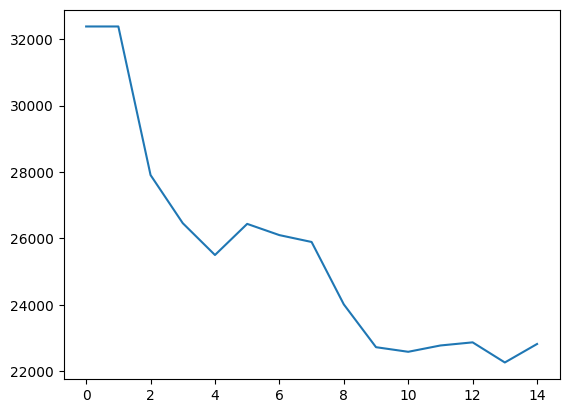

In [ ]:
plt.plot(index,test_error,label= 'test error')

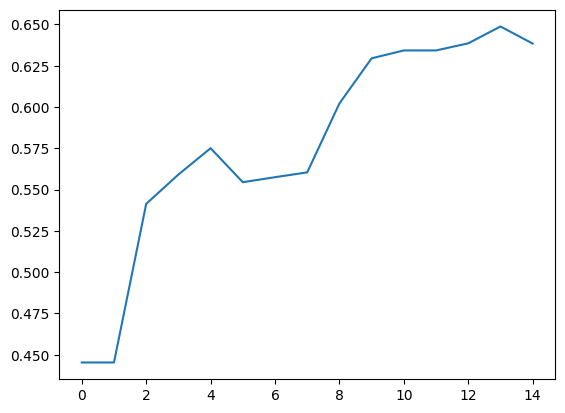

In [ ]:
plt.plot(index,train_accuracy,label='train accuracy')

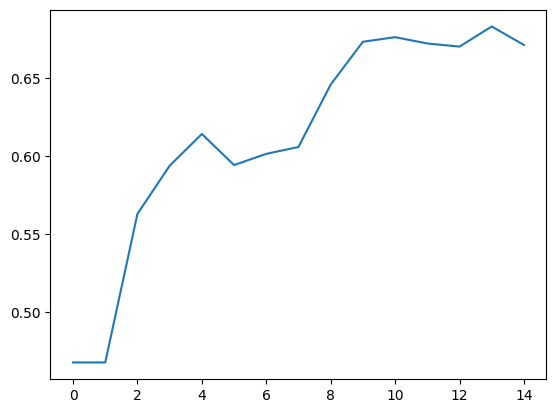

In [ ]:
plt.plot(index,test_accuracy,label='test accuracy')

### 10 models neural net

In [ ]:
train_error=[]
index=[]
train_accuracy=[]
test_error=[]
test_accuracy=[]
train_count_er=[]
test_count_er=[]
models=[]
alphas=[]
for i in range(10):
  weight,model,alpha = adaboost(train_dataset,weight,nn_classifier)
  models.append(model)
  alphas.append(alpha)
  train_err,train_count = model_error(models,alphas,train_dataset)
  test_err,test_count = model_error(models,alphas,test_dataset)
  index.append(i)
  train_error.append(train_err)
  train_accuracy.append(train_count/train_dataset.shape[0])
  test_error.append(test_err)
  test_accuracy.append(test_count/test_dataset.shape[0])
  train_count_er.append(train_dataset.shape[0]-train_count)
  test_count_er.append(test_dataset.shape[0]-test_count)

29589.000885168138
26061.76135234213
29098.11792645743
26336.332070739034
28457.89725753002
25745.25888280269
29007.18620456546
26116.360845645595
29564.656190678194
25871.196060877333
29731.447646050467
26521.641803558734
28581.557427663865
25774.885821638753
28936.66999306534
26148.102078095875
29244.516396281742
26104.497528825843
29519.924098294527
25784.7852579723


In [ ]:
import matplotlib.pyplot as plt

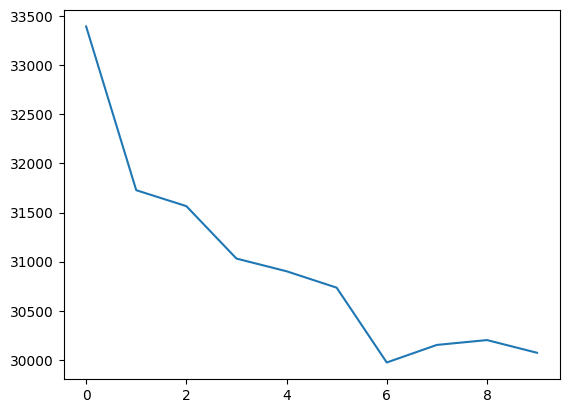

In [ ]:
plt.plot(index,train_error,label='train error')


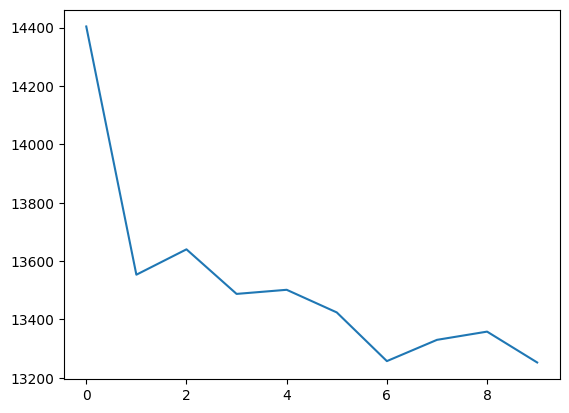

In [ ]:
plt.plot(index,test_error)

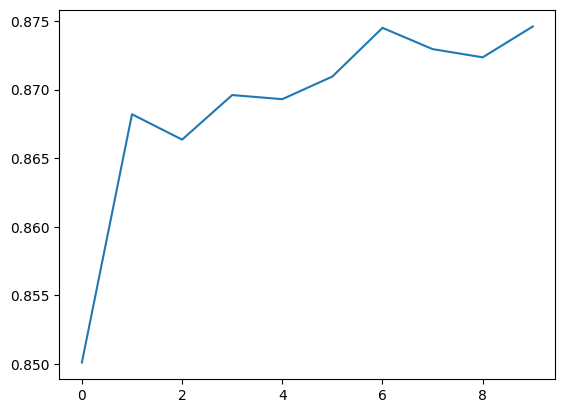

In [ ]:
plt.plot(index,test_accuracy)

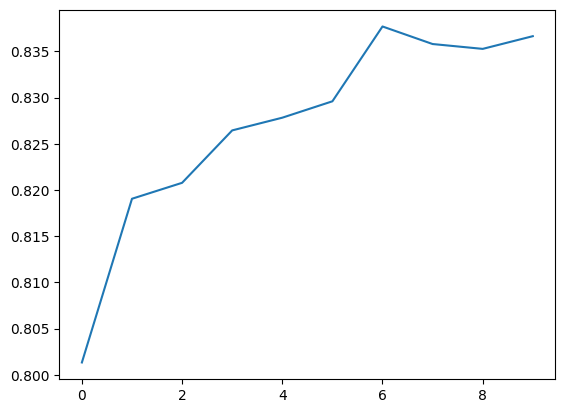

In [ ]:
plt.plot(index,train_accuracy)

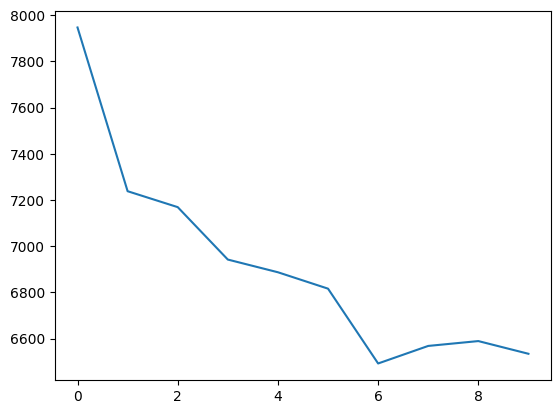

In [ ]:
plt.plot(index,train_count_er)

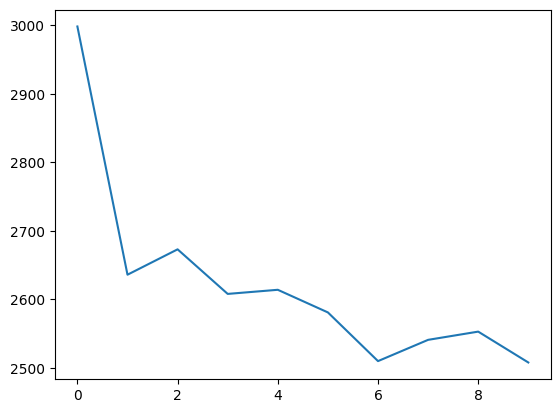

In [ ]:
plt.plot(index,test_count_er)

### 5 models neural net

In [ ]:
train_error=[]
index=[]
train_accuracy=[]
test_error=[]
test_accuracy=[]
train_count_er=[]
test_count_er=[]
models=[]
alphas=[]
for i in range(5):
  weight,model,alpha = adaboost(train_dataset,weight,nn_classifier)
  models.append(model)
  alphas.append(alpha)
  train_err,train_count = model_error(models,alphas,train_dataset)
  test_err,test_count = model_error(models,alphas,test_dataset)
  index.append(i)
  train_error.append(train_err)
  train_accuracy.append(train_count/train_dataset.shape[0])
  test_error.append(test_err)
  test_accuracy.append(test_count/test_dataset.shape[0])
  train_count_er.append(train_dataset.shape[0]-train_count)
  test_count_er.append(test_dataset.shape[0]-test_count)

25887.504738012045
22325.726920374753
26031.976219246244
22428.728566484446
24790.098185296865
20948.679894473713
24013.744267661226
19865.829464390015
26496.947369611466
22003.741733481023


In [ ]:
import matplotlib.pyplot as plt

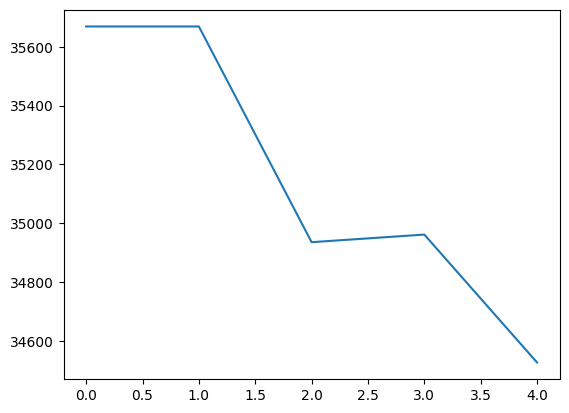

In [ ]:
plt.plot(index,train_error,label='train error')

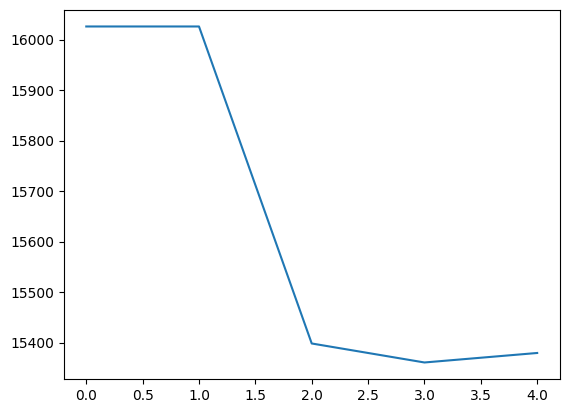

In [ ]:
plt.plot(index,test_error,label= 'test error')

# QUESTION 4

## Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
import math
from skimage import color,io
import cv2
from sklearn.manifold import TSNE
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import random

In [ ]:
np.set_printoptions(suppress=True)

## GMM Clustering (Q-4 a)

### Functions

In [ ]:
def p4_get_Image_dataset():
  classes = 10

  # Set the path of the zip file in Google Drive
  zip_path = "/content/drive/MyDrive/PRNN_A1/Assignment1_resized_images.zip"

  # Set the path to extract the zip file to in the Colab environment
  extract_path = "/content"

  # Extract the zip file to the specified path
  with zipfile.ZipFile(zip_path, 'r') as zip_ref:
      zip_ref.extractall(extract_path)
  extract_path = "/content/Assignment1_resized_images"

  lst = []
  for class_folder in sorted(os.listdir(extract_path)):
    class_folder_path = os.path.join(extract_path, class_folder)
    #print(class_folder_path)
    temp = []
    for filename in sorted(os.listdir(class_folder_path)):
      file_paths = os.path.join(class_folder_path, filename)
      #print(file_paths)
      img = cv2.imread(file_paths)
      gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      temp.append(gray_img)
    lst.append(temp)


  X = []
  Y = []
  for i in range(classes):
    tmp = []
    for j in range(len(lst[i])):
      x = np.ndarray.flatten(lst[i][j])
      tmp.append(x)
    a = np.stack(tmp,axis = 0)
    X.append(a)
    Y.append(i)

  a = X[0]
  b = np.zeros((X[0].shape[0],1))
  dataset = np.column_stack((a,b))
  for i in range(1,classes):
    a=X[i]
    b = i*np.ones((X[i].shape[0],1))
    temp = np.column_stack((a,b))
    dataset = np.row_stack((dataset,temp))

  return dataset

In [ ]:
def p4_split_dataset(dataset,train_ratio):
  classes = np.unique(dataset[:,-1])
  dataset_size = dataset.shape[0]
  count = int(train_ratio*(dataset_size))

  np.random.shuffle(dataset)
  train_dataset, test_dataset = dataset[:count,:], dataset[count:,:]

  return train_dataset,test_dataset

In [ ]:
def p4_normalize_Image_dataset(dataset):
  dataset = np.c_[ dataset[:,:-1]/255, dataset[:,-1]]
  return dataset

In [ ]:
def p4_GMM_training(train_dataset,epochs,number_of_Gaussian):
  train_dataset = train_dataset[:,:-1]
  dimension = train_dataset.shape[1]
  
  # Means = []
  # Pi = []

  # epochs = 10
  current_epoch = 0
  Means = np.random.random_sample((dimension,number_of_Gaussian)) #np.random.uniform(0, 1,(dimension,number_of_Gaussian)) #np.zeros((dimension,number_of_Gaussian))
  Pi = np.ones(number_of_Gaussian)/number_of_Gaussian
  
  for current_epoch in range(epochs):            
      # print("epochs number:",current_epoch)
      Gamma = np.zeros((train_dataset.shape[0],number_of_Gaussian))
      
      
      data_point_number = 0
      
      #Calculating Gamma for each datapoint and each class
      for data_point in train_dataset:
          Gamma_each_Gaussian = np.zeros(number_of_Gaussian)
          for k in range(number_of_Gaussian):
              
              temp1 = data_point-Means[:,k]

              temp3 = (-1/2)*(np.power(np.linalg.norm(temp1),2))

              temp4 = np.exp(temp3)

              temp5 = temp4*Pi[k]

              Gamma_each_Gaussian[k] = temp5

          Gamma_each_Gaussian = Gamma_each_Gaussian/np.sum(Gamma_each_Gaussian)

          Gamma[data_point_number,:] = Gamma_each_Gaussian
          
          data_point_number += 1
          

      
      # Updating mean
      
      for k in range(number_of_Gaussian):
          #updating mean in one line
          Means[:,k] = np.average(train_dataset,axis = 0, weights=Gamma[:,k])

      # Nk = np.sum(Gamma,axis = 0)
      # for k in range(number_of_Gaussian):
      #   N = train_dataset.shape[0]
      #   sum = 0
      #   for i in range(N):
      #       # print(Gamma[i,k].shape,train_dataset[i].shape)
      #       sum += Gamma[i,k]*train_dataset[i]
      #   Means[:,k] = sum/Nk[k]
      

      # Updating Co-variance matrix
      
      Nk = np.sum(Gamma,axis = 0)


      # Updating Pi
      
      Pi = Nk/train_dataset.shape[0]
    
    
  return Means,Pi


In [ ]:
def entropy(labels):
    """
    Calculate the entropy of a list of labels.
    """
    _, counts = np.unique(labels, return_counts=True)
    probs = counts / len(labels)
    return -np.sum(probs * np.log2(probs))

def mutual_information(labels_true, labels_pred):
    """
    Calculate the mutual information between two lists of labels.
    """
    contingency = np.histogram2d(labels_true, labels_pred)[0]
    # normalize the contingency matrix
    contingency = contingency / np.sum(contingency)
    # calculate the marginal probabilities
    p_true = np.sum(contingency, axis=1)
    p_pred = np.sum(contingency, axis=0)
    # calculate the mutual information
    mi = 0
    for i in range(len(p_true)):
        for j in range(len(p_pred)):
            if contingency[i, j] > 0:
                mi += contingency[i, j] * np.log2(contingency[i, j] / (p_true[i] * p_pred[j]))
    return mi

def normalized_mutual_info_score(labels_true, labels_pred):
    """
    Calculate the Normalized Mutual Information between two lists of labels.
    """
    mi = mutual_information(labels_true, labels_pred)
    entropy_true = entropy(labels_true)
    entropy_pred = entropy(labels_pred)
    nmi = 2 * mi / (entropy_true + entropy_pred)
    return nmi

In [ ]:
def get_labels(X,Means,Pi):
  number_of_Gaussian = Means.shape[1]
  data_point_number = 0
  y_pred = np.zeros(X.shape[0])
  y_true = X[:,-1]
  for data_point in X:
    Gammaij = np.zeros(number_of_Gaussian)
    for k in range(number_of_Gaussian):
        temp1 = data_point[:-1]-Means[:,k]

        temp3 = (-1/2)*(np.power(np.linalg.norm(temp1),2))

        temp4 = np.exp(temp3)
        
        temp5 = temp4*Pi[k]

        Gammaij[k] = temp5

    y_pred[data_point_number] = np.argmax(Gammaij)
        
    data_point_number += 1

  return y_true,y_pred

In [ ]:
def get_colors(num_colors):
  colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'pink', 'black', 'gray', 'brown', 'navy', 'teal', 'maroon', 'olive', 'silver', 'gold', 'indigo', 'violet', 'coral', 'turquoise', 'salmon']
  if num_colors > len(colors):
      raise ValueError("Colors list must have at least as many elements as there are unique labels.")
  selected_colors = colors[:num_colors]
  return selected_colors

In [ ]:
dataset = np.genfromtxt("/content/drive/MyDrive/PRNN_A1/kmnist.csv", delimiter=",", dtype=float)

In [ ]:
dataset = p4_normalize_Image_dataset(dataset)

In [ ]:
NMI = np.zeros(10)

In [ ]:
# applying TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(dataset[:,:-1])

### Plots

In [ ]:
# Case-1 K = 2
Means1,Pi1 = p4_GMM_training(dataset,20,2) 
y_true1,y_pred1 = get_labels(dataset,Means1,Pi1)
NMI[0] = normalized_mutual_info_score(y_true1, y_pred1)

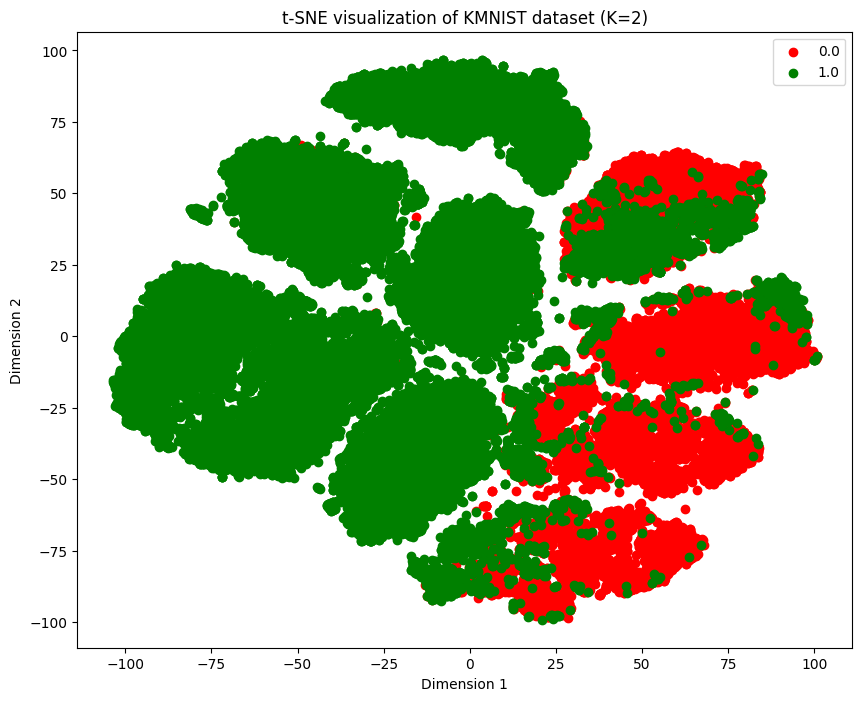

In [ ]:
# Map each label to a corresponding color
colors = get_colors(2)
labels = np.unique(y_pred1)
label_to_color = dict(zip(labels, colors))
colors = [label_to_color[label] for label in y_pred1]


# Plot the data points with color as the label
fig, ax = plt.subplots(figsize=(10, 8))
for label in labels:
    mask = (y_pred1 == label)
    ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], c=label_to_color[label], label=label)

ax.legend(labels)
ax.set_title("t-SNE visualization of KMNIST dataset (K=2)")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
plt.show()

In [ ]:
# Case-2 K = 6
Means2,Pi2 = p4_GMM_training(dataset,20,6) 
y_true2,y_pred2 = get_labels(dataset,Means2,Pi2)
NMI[1] = normalized_mutual_info_score(y_true2, y_pred2)

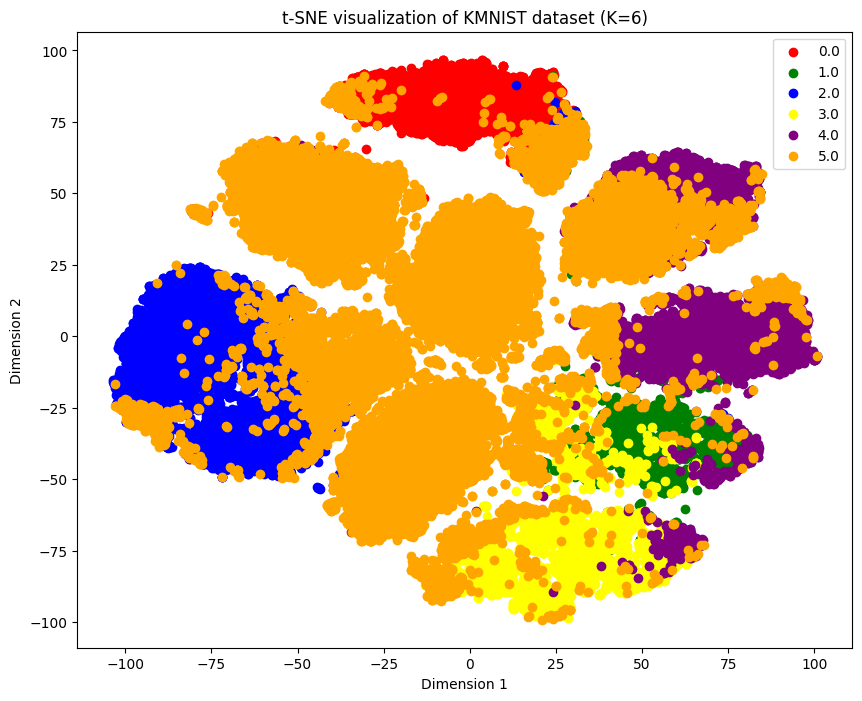

In [ ]:
# Map each label to a corresponding color
# colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'pink']
colors = get_colors(6)
labels = np.unique(y_pred2)
label_to_color = dict(zip(labels, colors))
colors = [label_to_color[label] for label in y_pred2]


# Plot the data points with color as the label
fig, ax = plt.subplots(figsize=(10, 8))
for label in labels:
    mask = (y_pred2 == label)
    ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], c=label_to_color[label], label=label)

ax.legend(labels)
ax.set_title("t-SNE visualization of KMNIST dataset (K=6)")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
plt.show()

In [ ]:
# Case-2 K = 10
Means3,Pi3 = p4_GMM_training(dataset,15,10)
y_true3,y_pred3 = get_labels(dataset,Means3,Pi3)
NMI[2] = normalized_mutual_info_score(y_true3, y_pred3)

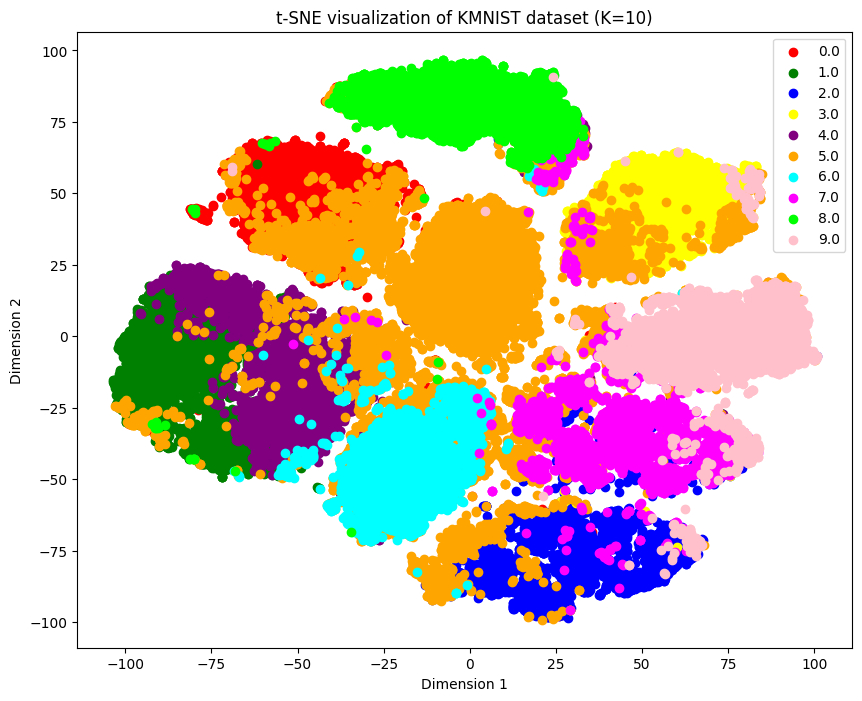

In [ ]:
# Map each label to a corresponding color
# colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'pink']
colors = get_colors(10)
labels = np.unique(y_pred3)
label_to_color = dict(zip(labels, colors))
colors = [label_to_color[label] for label in y_pred3]


# Plot the data points with color as the label
fig, ax = plt.subplots(figsize=(10, 8))
for label in labels:
    mask = (y_pred3 == label)
    ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], c=label_to_color[label], label=label)

ax.legend(labels)
ax.set_title("t-SNE visualization of KMNIST dataset (K=10)")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
plt.show()

In [ ]:
# Case-4 K = 12
Means4,Pi4 = p4_GMM_training(dataset,20,12) 
y_true4,y_pred4 = get_labels(dataset,Means4,Pi4)
NMI[3] = normalized_mutual_info_score(y_true4, y_pred4)

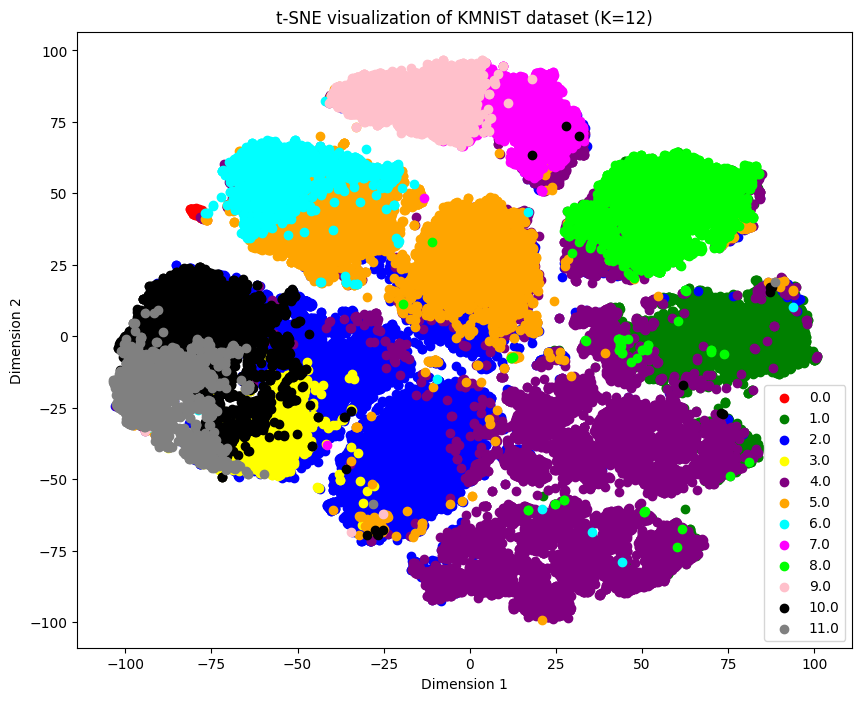

In [ ]:
# Map each label to a corresponding color
# colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'pink']
colors = get_colors(12)
labels = np.unique(y_pred4)
label_to_color = dict(zip(labels, colors))
colors = [label_to_color[label] for label in y_pred4]


# Plot the data points with color as the label
fig, ax = plt.subplots(figsize=(10, 8))
for label in labels:
    mask = (y_pred4 == label)
    ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], c=label_to_color[label], label=label)

ax.legend(labels)
ax.set_title("t-SNE visualization of KMNIST dataset (K=12)")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
plt.show()

In [ ]:
# Case-5 K = 14
Means5,Pi5 = p4_GMM_training(dataset,20,14) 
y_true5,y_pred5 = get_labels(dataset,Means5,Pi5)
NMI[4] = normalized_mutual_info_score(y_true5, y_pred5)

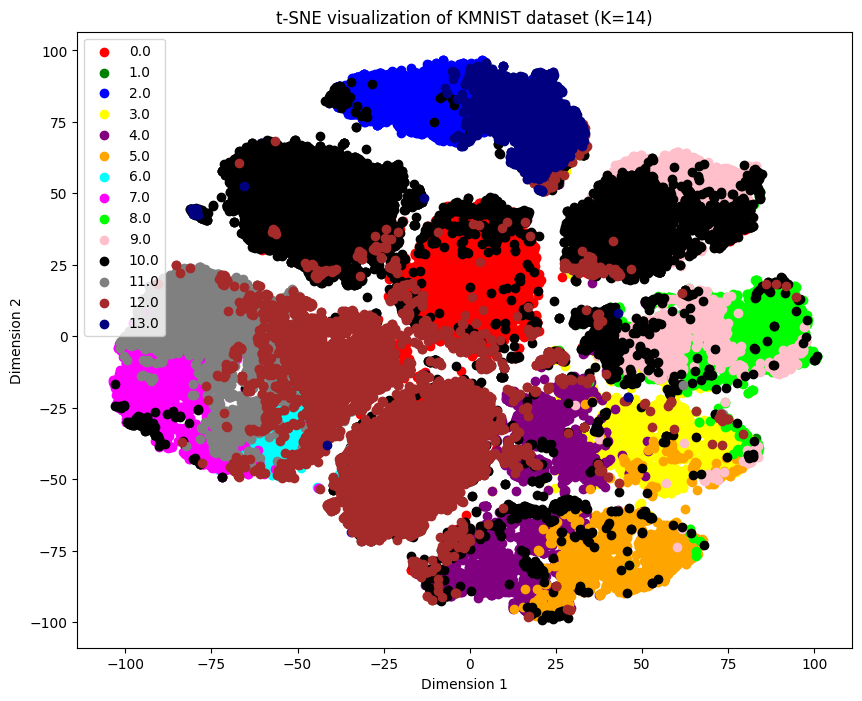

In [ ]:
# Map each label to a corresponding color
# colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'pink']
colors = get_colors(14)
labels = np.unique(y_pred5)
label_to_color = dict(zip(labels, colors))
colors = [label_to_color[int(label)] for label in y_pred5]


# Plot the data points with color as the label
fig, ax = plt.subplots(figsize=(10, 8))
for label in labels:
    mask = (y_pred5 == label)
    ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], c=label_to_color[label], label=label)

ax.legend(labels)
ax.set_title("t-SNE visualization of KMNIST dataset (K=14)")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
plt.show()

In [ ]:
# Case-6 K = 16
Means6,Pi6 = p4_GMM_training(dataset,20,16) 
y_true6,y_pred6 = get_labels(dataset,Means6,Pi6)
NMI[5] = normalized_mutual_info_score(y_true6, y_pred6)

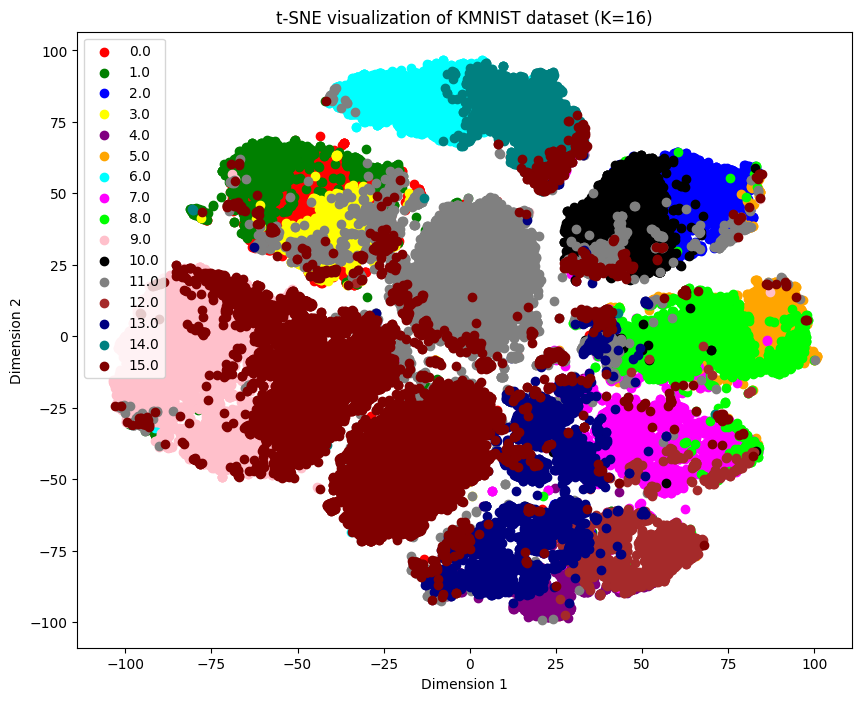

In [ ]:

# Map each label to a corresponding color
# colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'pink']
colors = get_colors(16)
labels = np.unique(y_pred6)
label_to_color = dict(zip(labels, colors))
colors = [label_to_color[label] for label in y_pred6]


# Plot the data points with color as the label
fig, ax = plt.subplots(figsize=(10, 8))
for label in labels:
    mask = (y_pred6 == label)
    ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], c=label_to_color[label], label=label)

ax.legend(labels)
ax.set_title("t-SNE visualization of KMNIST dataset (K=16)")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
plt.show()

In [ ]:
# Case-7 K = 18
Means7,Pi7 = p4_GMM_training(dataset,20,18) 
y_true7,y_pred7 = get_labels(dataset,Means7,Pi7)
NMI[6] = normalized_mutual_info_score(y_true7, y_pred7)

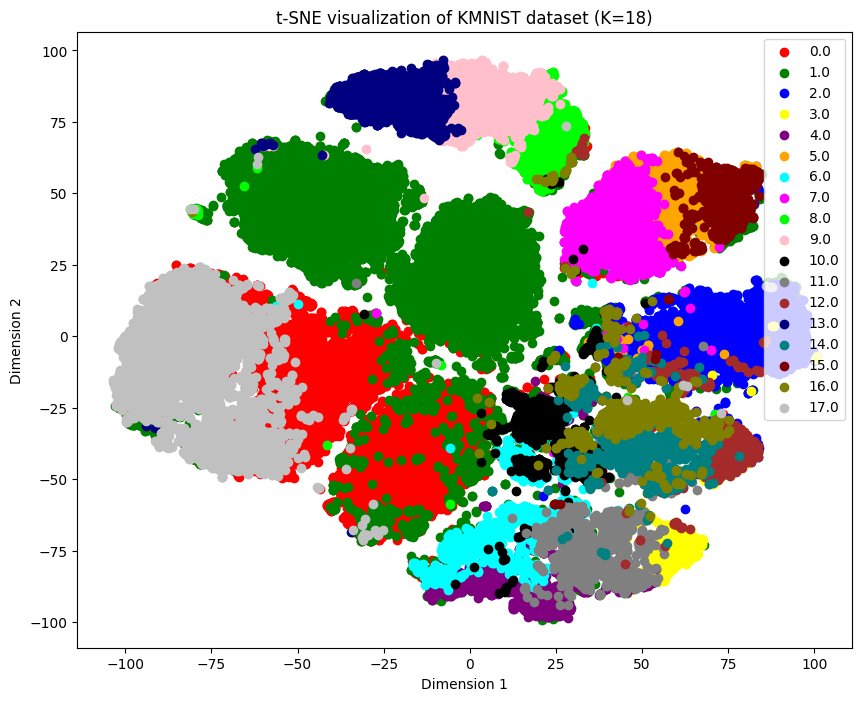

In [ ]:
# Map each label to a corresponding color
# colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'pink']
colors = get_colors(18)
labels = np.unique(y_pred7)
label_to_color = dict(zip(labels, colors))
colors = [label_to_color[label] for label in y_pred7]


# Plot the data points with color as the label
fig, ax = plt.subplots(figsize=(10, 8))
for label in labels:
    mask = (y_pred7 == label)
    ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], c=label_to_color[label], label=label)

ax.legend(labels)
ax.set_title("t-SNE visualization of KMNIST dataset (K=18)")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
plt.show()

In [ ]:
# Case-8 K = 20
Means8,Pi8 = p4_GMM_training(dataset,20,20) 
y_true8,y_pred8 = get_labels(dataset,Means8,Pi8)
NMI[7] = normalized_mutual_info_score(y_true8, y_pred8)

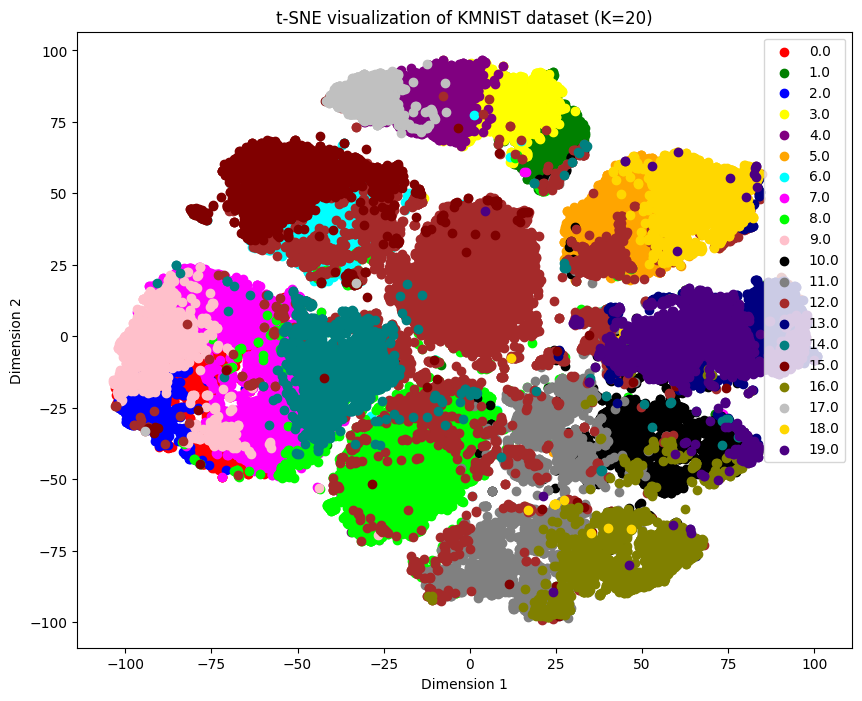

In [ ]:
# Map each label to a corresponding color
# colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'pink']
colors = get_colors(20)
labels = np.unique(y_pred8)
label_to_color = dict(zip(labels, colors))
colors = [label_to_color[label] for label in y_pred8]


# Plot the data points with color as the label
fig, ax = plt.subplots(figsize=(10, 8))
for label in labels:
    mask = (y_pred8 == label)
    ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], c=label_to_color[label], label=label)

ax.legend(labels)
ax.set_title("t-SNE visualization of KMNIST dataset (K=20)")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
plt.show()

In [ ]:
# Case-9 K = 22
Means9,Pi9 = p4_GMM_training(dataset,20,22) 
y_true9,y_pred9 = get_labels(dataset,Means9,Pi9)
NMI[8] = normalized_mutual_info_score(y_true9, y_pred9)

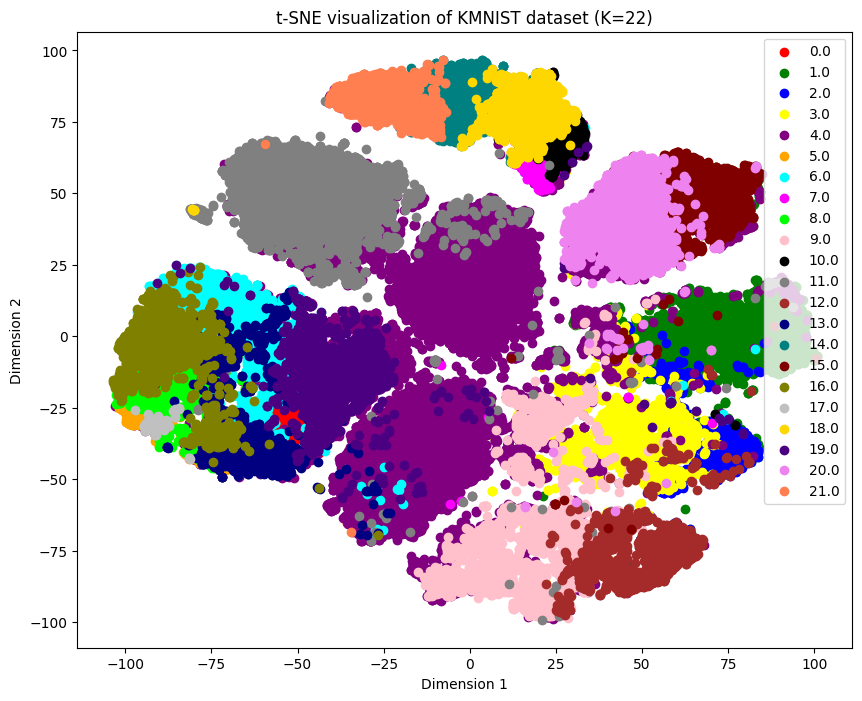

In [ ]:
# Map each label to a corresponding color
# colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'pink']
colors = get_colors(22)
labels = np.unique(y_pred9)
label_to_color = dict(zip(labels, colors))
colors = [label_to_color[label] for label in y_pred9]


# Plot the data points with color as the label
fig, ax = plt.subplots(figsize=(10, 8))
for label in labels:
    mask = (y_pred9 == label)
    ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], c=label_to_color[label], label=label)

ax.legend(labels)
ax.set_title("t-SNE visualization of KMNIST dataset (K=22)")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
plt.show()

In [ ]:
# Case-10 K = 24
Means10,Pi10 = p4_GMM_training(dataset,20,24)
y_true10,y_pred10 = get_labels(dataset,Means10,Pi10)
NMI[9] = normalized_mutual_info_score(y_true10, y_pred10)

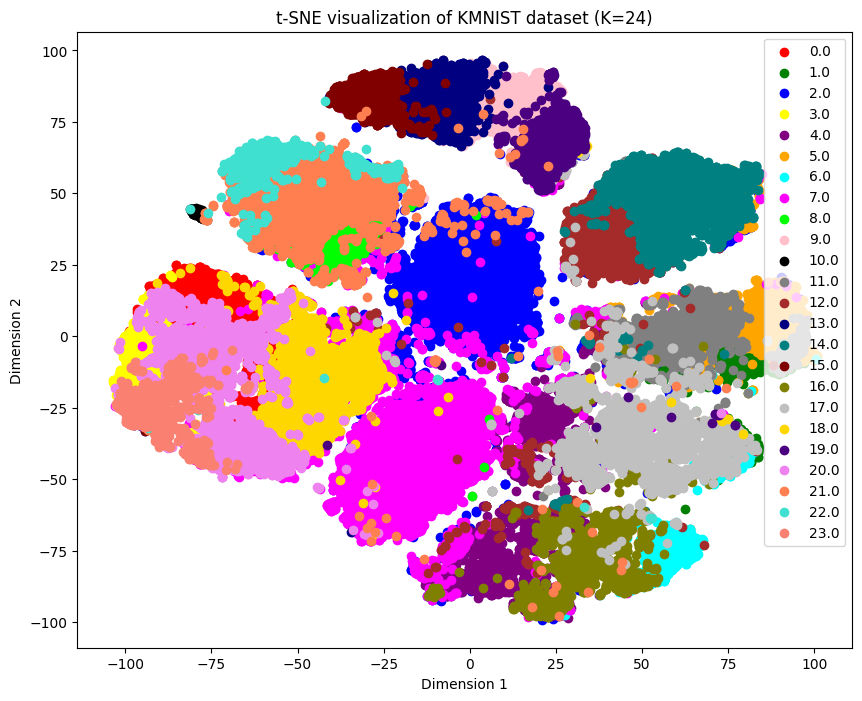

In [ ]:
# Map each label to a corresponding color
# colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'pink']
colors = get_colors(24)
labels = np.unique(y_pred10)
label_to_color = dict(zip(labels, colors))
colors = [label_to_color[label] for label in y_pred10]

# fig, ax = plt.subplots(figsize=(10, 8))
# Plot the data points with color as the label
fig, ax = plt.subplots(figsize=(10, 8))
for label in labels:
    mask = (y_pred10 == label)
    ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], c=label_to_color[label], label=label)

ax.legend(labels)
ax.set_title("t-SNE visualization of KMNIST dataset (K=24)")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
plt.show()

##Normalized mutual information

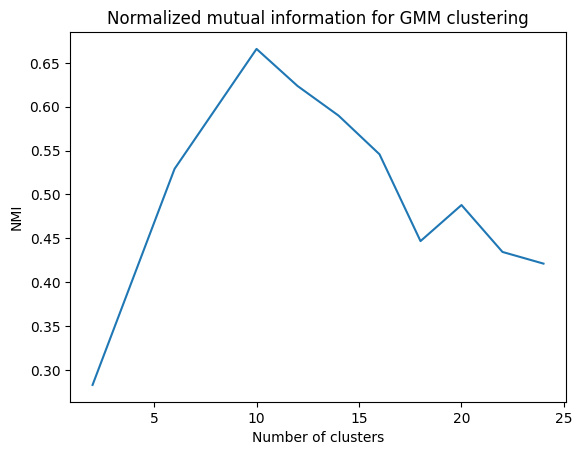

In [ ]:
K = np.array([2,6,10,12,14,16,18,20,22,24])
# Plot the x and y arrays
plt.plot(K, NMI)

# Add a title to the legend
plt.title('Normalized mutual information for GMM clustering')

# Add labels for the x and y axes
plt.xlabel('Number of clusters')
plt.ylabel('NMI')

# Display the plot
plt.show()

## K-Means Clustering (Q-4 b)

### Functions

In [ ]:
# Define the K-Means algorithm
def k_means(X, n_clusters, max_iter=100, random_state=42):
    """
    K-Means clustering algorithm.
    """
    np.random.seed(random_state)
    # Initialize the centroids randomly
    centroids = X[np.random.choice(len(X), n_clusters, replace=False)]
    for i in range(max_iter):
        # Assign each data point to the nearest centroid
        labels = pairwise_distances_argmin(X, centroids)
        # Update the centroids as the mean of the data points assigned to them
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(n_clusters)])
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels



In [ ]:
def pairwise_distances_argmin(X, Y):
    """
    Compute the indices of the rows in Y which are closest to each row in X.
    Returns an array of shape (len(X),) where each entry is the index of the closest row in Y.
    """
    # Compute the pairwise distances between each row in X and each row in Y
    distances = np.sqrt(np.sum((X[:, np.newaxis, :] - Y[np.newaxis, :, :]) ** 2, axis=2))
    # Find the index of the row in Y with the smallest distance for each row in X
    indices = np.argmin(distances, axis=1)
    return indices

### Plots

In [ ]:
NMI_Kmeans = np.zeros(10)

In [ ]:
# Run the K-Means algorithm K = 2
centroids, y_pred_kmeans1 = k_means(dataset[:,:-1], n_clusters=2)
y_true_kmeans1 = dataset[:,-1]
NMI_Kmeans[0] = normalized_mutual_info_score(y_true_kmeans1, y_pred_kmeans1)

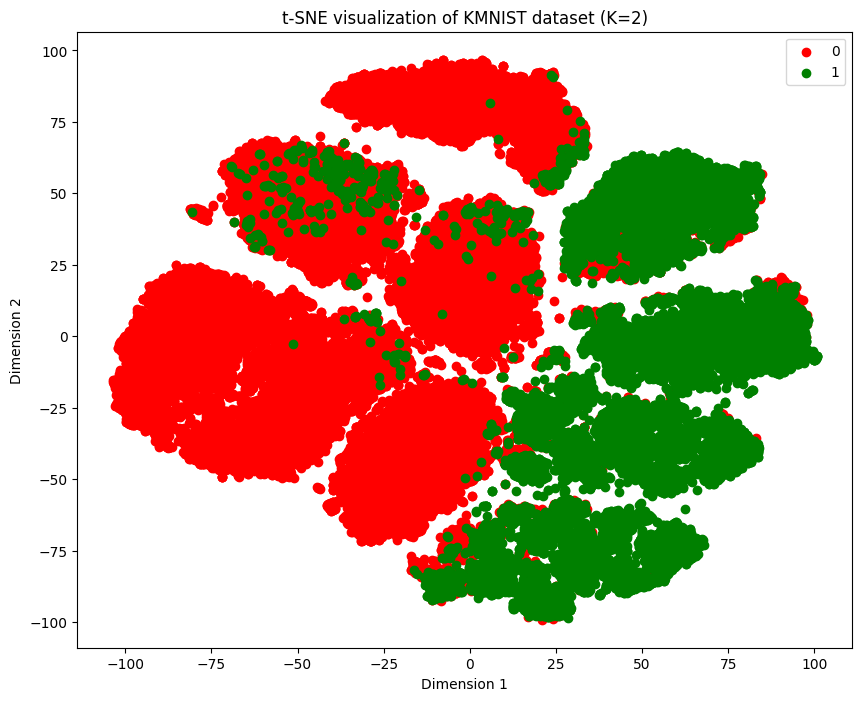

In [ ]:
# Map each label to a corresponding color
# colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'pink']
colors = get_colors(2)
labels = np.unique(y_pred_kmeans1)
label_to_color = dict(zip(labels, colors))
colors = [label_to_color[label] for label in y_pred_kmeans1]


# Plot the data points with color as the label
fig, ax = plt.subplots(figsize=(10, 8))
for label in labels:
    mask = (y_pred_kmeans1 == label)
    ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], c=label_to_color[label], label=label)

ax.legend(labels)
ax.set_title("t-SNE visualization of KMNIST dataset (K=2)")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
plt.show()

In [ ]:
# Run the K-Means algorithm K = 6
centroids, y_pred_kmeans2 = k_means(dataset[:,:-1], n_clusters=6)
y_true_kmeans2 = dataset[:,-1]
NMI_Kmeans[1] = normalized_mutual_info_score(y_true_kmeans2, y_pred_kmeans2)

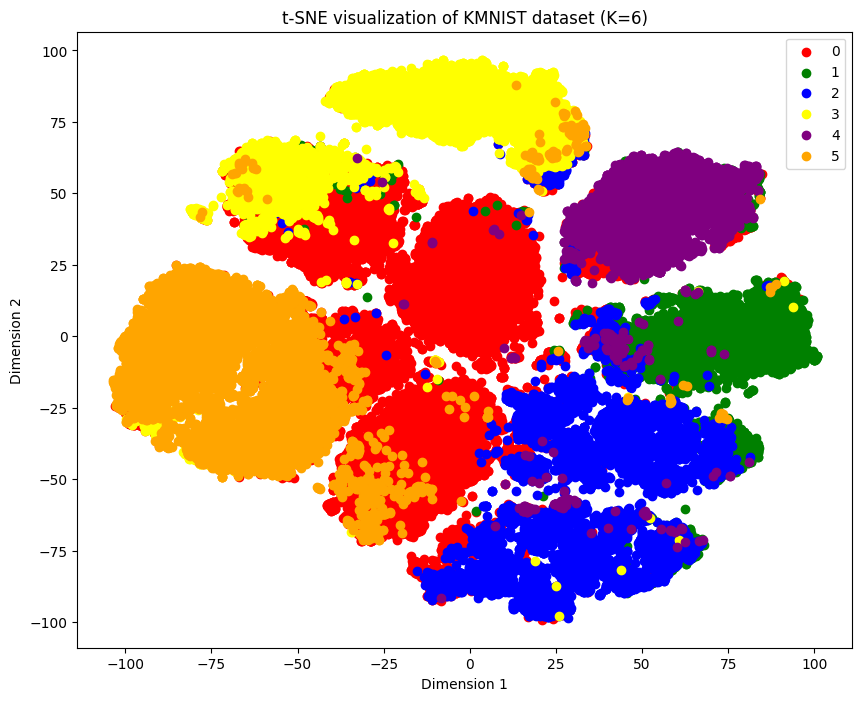

In [ ]:
# Map each label to a corresponding color
# colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'pink']
colors = get_colors(6)
labels = np.unique(y_pred_kmeans2)
label_to_color = dict(zip(labels, colors))
colors = [label_to_color[label] for label in y_pred_kmeans2]


# Plot the data points with color as the label
fig, ax = plt.subplots(figsize=(10, 8))
for label in labels:
    mask = (y_pred_kmeans2 == label)
    ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], c=label_to_color[label], label=label)

ax.legend(labels)
ax.set_title("t-SNE visualization of KMNIST dataset (K=6)")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
plt.show()

In [ ]:
# Run the K-Means algorithm K = 10
centroids, y_pred_kmeans3 = k_means(dataset[:,:-1], n_clusters=10)
y_true_kmeans3 = dataset[:,-1]
NMI_Kmeans[2] = normalized_mutual_info_score(y_true_kmeans3, y_pred_kmeans3)

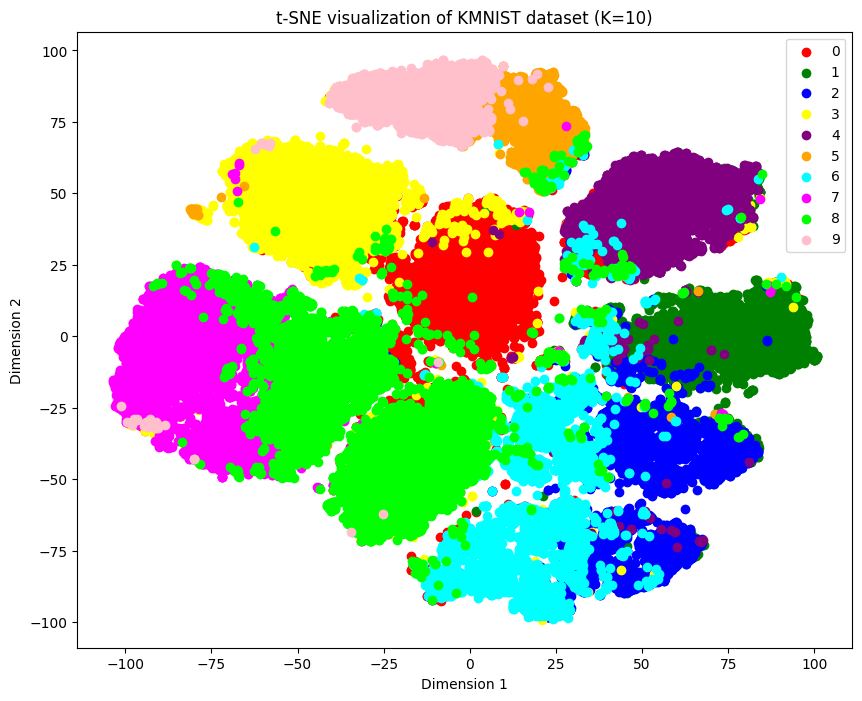

In [ ]:
# Map each label to a corresponding color
# colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'pink']
colors = get_colors(10)
labels = np.unique(y_pred_kmeans3)
label_to_color = dict(zip(labels, colors))
colors = [label_to_color[label] for label in y_pred_kmeans3]


# Plot the data points with color as the label
fig, ax = plt.subplots(figsize=(10, 8))
for label in labels:
    mask = (y_pred_kmeans3 == label)
    ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], c=label_to_color[label], label=label)

ax.legend(labels)
ax.set_title("t-SNE visualization of KMNIST dataset (K=10)")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
plt.show()

In [ ]:
# Run the K-Means algorithm K = 12
centroids, y_pred_kmeans4 = k_means(dataset[:,:-1], n_clusters=12)
y_true_kmeans4 = dataset[:,-1]
NMI_Kmeans[3] = normalized_mutual_info_score(y_true_kmeans4, y_pred_kmeans4)

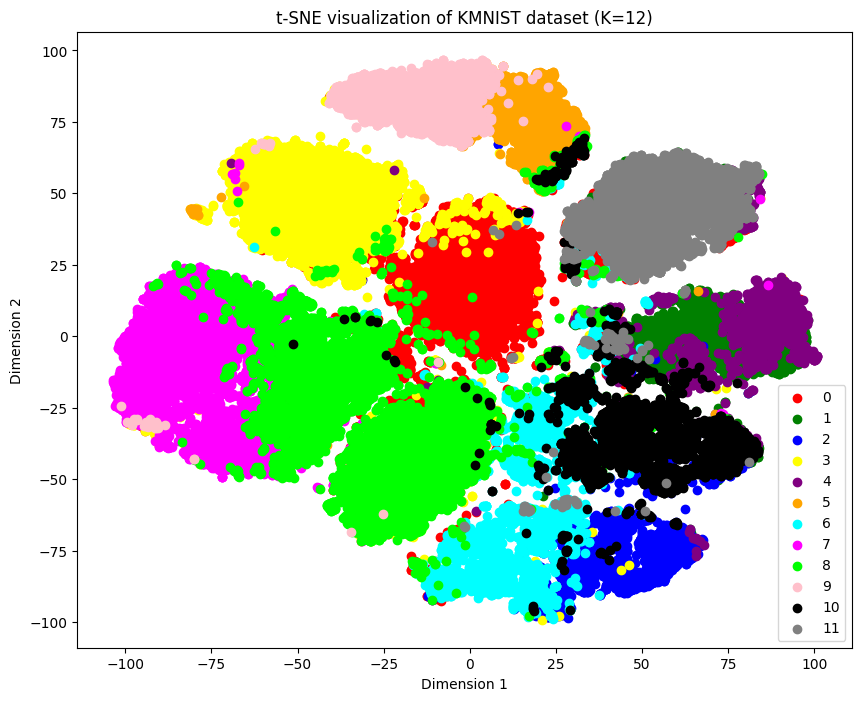

In [ ]:
# Map each label to a corresponding color
# colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'pink']
colors = get_colors(12)
labels = np.unique(y_pred_kmeans4)
label_to_color = dict(zip(labels, colors))
colors = [label_to_color[label] for label in y_pred_kmeans4]


# Plot the data points with color as the label
fig, ax = plt.subplots(figsize=(10, 8))
for label in labels:
    mask = (y_pred_kmeans4 == label)
    ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], c=label_to_color[label], label=label)

ax.legend(labels)
ax.set_title("t-SNE visualization of KMNIST dataset (K=12)")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
plt.show()

In [ ]:
# Run the K-Means algorithm K = 14
centroids, y_pred_kmeans5 = k_means(dataset[:,:-1], n_clusters=14)
y_true_kmeans5 = dataset[:,-1]
NMI_Kmeans[4] = normalized_mutual_info_score(y_true_kmeans5, y_pred_kmeans5)

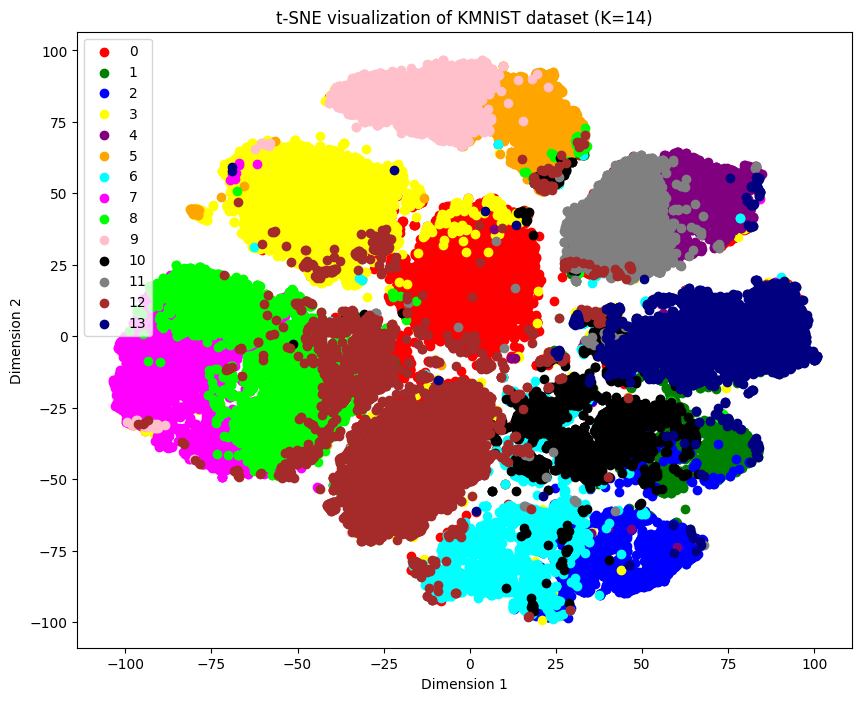

In [ ]:
# Map each label to a corresponding color
# colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'pink']
colors = get_colors(14)
labels = np.unique(y_pred_kmeans5)
label_to_color = dict(zip(labels, colors))
colors = [label_to_color[label] for label in y_pred_kmeans5]


# Plot the data points with color as the label
fig, ax = plt.subplots(figsize=(10, 8))
for label in labels:
    mask = (y_pred_kmeans5 == label)
    ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], c=label_to_color[label], label=label)

ax.legend(labels)
ax.set_title("t-SNE visualization of KMNIST dataset (K=14)")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
plt.show()

In [ ]:
# Run the K-Means algorithm K = 16
centroids, y_pred_kmeans6 = k_means(dataset[:,:-1], n_clusters=16)
y_true_kmeans6 = dataset[:,-1]
NMI_Kmeans[5] = normalized_mutual_info_score(y_true_kmeans6, y_pred_kmeans6)

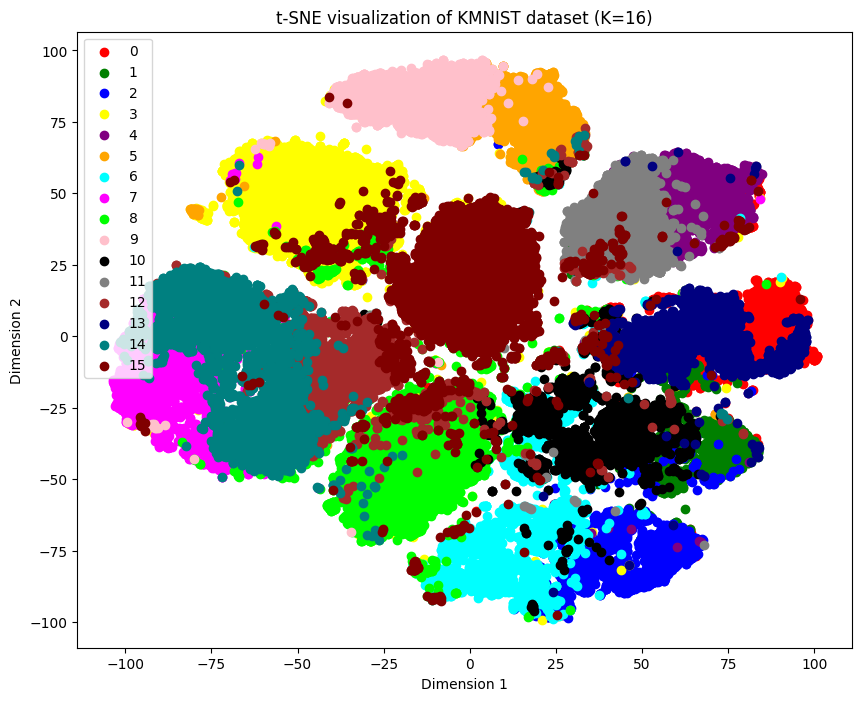

In [ ]:
# Map each label to a corresponding color
# colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'pink']
colors = get_colors(16)
labels = np.unique(y_pred_kmeans6)
label_to_color = dict(zip(labels, colors))
colors = [label_to_color[label] for label in y_pred_kmeans6]


# Plot the data points with color as the label
fig, ax = plt.subplots(figsize=(10, 8))
for label in labels:
    mask = (y_pred_kmeans6 == label)
    ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], c=label_to_color[label], label=label)

ax.legend(labels)
ax.set_title("t-SNE visualization of KMNIST dataset (K=16)")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
plt.show()

In [ ]:
# Run the K-Means algorithm K = 18
centroids, y_pred_kmeans7 = k_means(dataset[:,:-1], n_clusters=18)
y_true_kmeans7 = dataset[:,-1]
NMI_Kmeans[6] = normalized_mutual_info_score(y_true_kmeans7, y_pred_kmeans7)

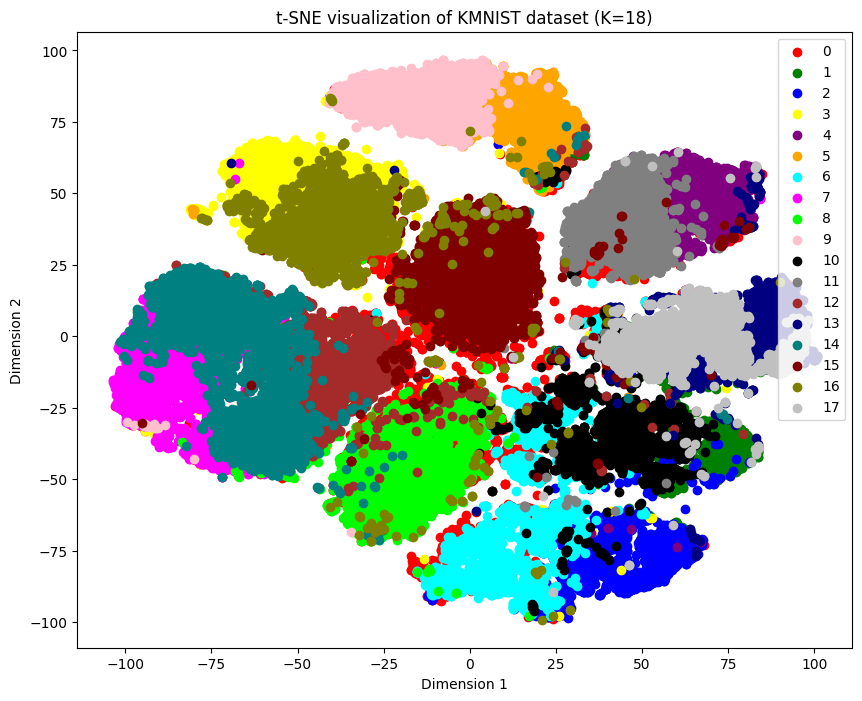

In [ ]:
# Map each label to a corresponding color
# colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'pink']
colors = get_colors(18)
labels = np.unique(y_pred_kmeans7)
label_to_color = dict(zip(labels, colors))
colors = [label_to_color[label] for label in y_pred_kmeans7]


# Plot the data points with color as the label
fig, ax = plt.subplots(figsize=(10, 8))
for label in labels:
    mask = (y_pred_kmeans7 == label)
    ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], c=label_to_color[label], label=label)

ax.legend(labels)
ax.set_title("t-SNE visualization of KMNIST dataset (K=18)")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
plt.show()

In [ ]:
# Run the K-Means algorithm K = 20
centroids, y_pred_kmeans8 = k_means(dataset[:,:-1], n_clusters=20)
y_true_kmeans8 = dataset[:,-1]
NMI_Kmeans[7] = normalized_mutual_info_score(y_true_kmeans8, y_pred_kmeans8)

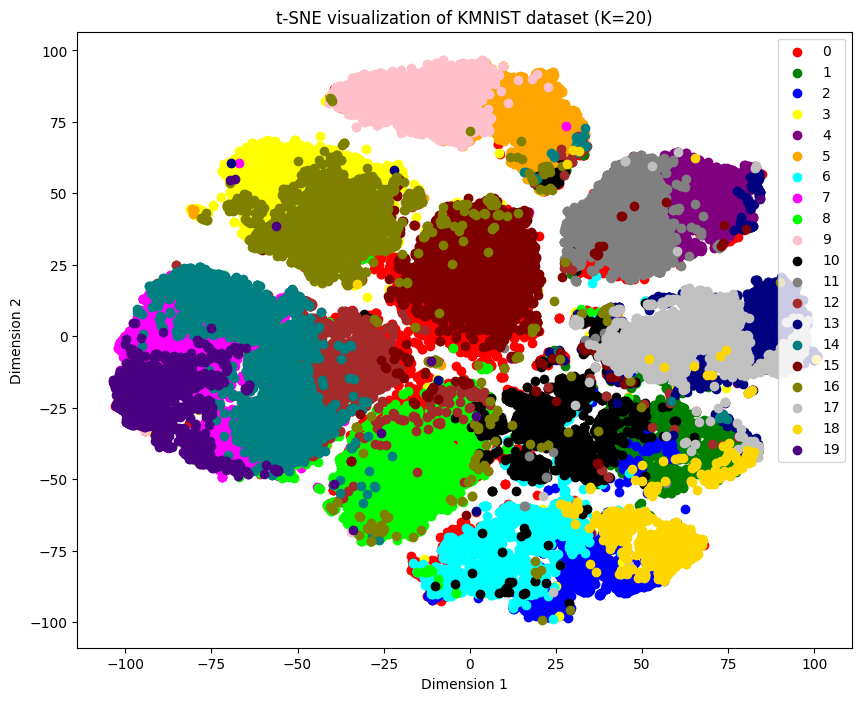

In [ ]:
# Map each label to a corresponding color
# colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'pink']
colors = get_colors(20)
labels = np.unique(y_pred_kmeans8)
label_to_color = dict(zip(labels, colors))
colors = [label_to_color[label] for label in y_pred_kmeans8]


# Plot the data points with color as the label
fig, ax = plt.subplots(figsize=(10, 8))
for label in labels:
    mask = (y_pred_kmeans8 == label)
    ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], c=label_to_color[label], label=label)

ax.legend(labels)
ax.set_title("t-SNE visualization of KMNIST dataset (K=20)")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
plt.show()

In [ ]:
# Run the K-Means algorithm K = 22
centroids, y_pred_kmeans9 = k_means(dataset[:,:-1], n_clusters=22)
y_true_kmeans9 = dataset[:,-1]
NMI_Kmeans[8] = normalized_mutual_info_score(y_true_kmeans9, y_pred_kmeans9)

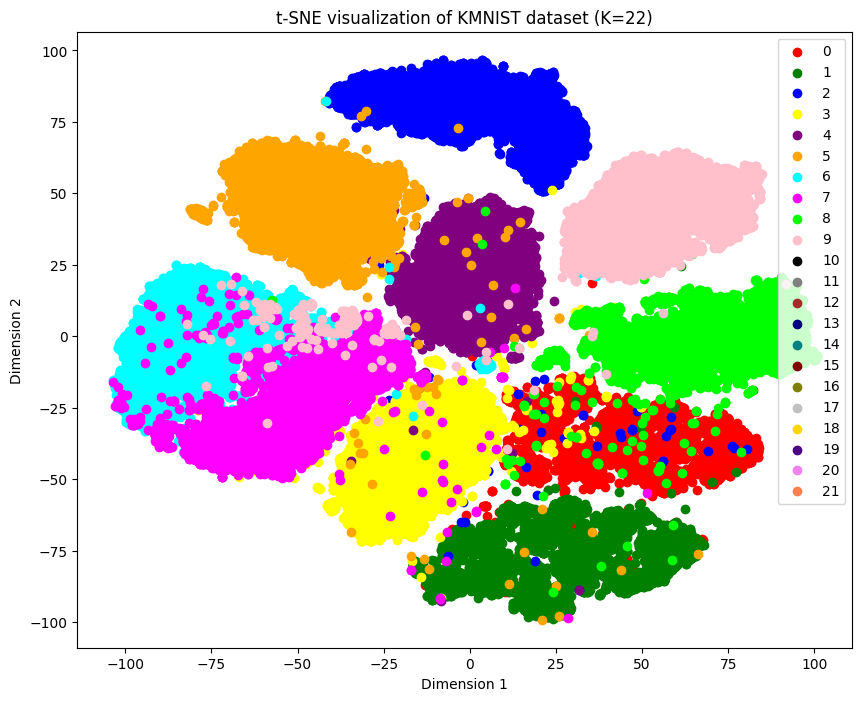

In [ ]:
# Map each label to a corresponding color
# colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'pink']
colors = get_colors(22)
labels = np.unique(y_pred_kmeans9)
label_to_color = dict(zip(labels, colors))
colors = [label_to_color[label] for label in y_pred_kmeans9]


# Plot the data points with color as the label
fig, ax = plt.subplots(figsize=(10, 8))
for label in labels:
    mask = (y_true_kmeans9 == label)
    ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], c=label_to_color[label], label=label)

ax.legend(labels)
ax.set_title("t-SNE visualization of KMNIST dataset (K=22)")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
plt.show()

In [ ]:
# Run the K-Means algorithm K = 24
centroids, y_pred_kmeans10 = k_means(dataset[:,:-1], n_clusters=24)
y_true_kmeans10 = dataset[:,-1]
NMI_Kmeans[9] = normalized_mutual_info_score(y_true_kmeans10, y_pred_kmeans10)

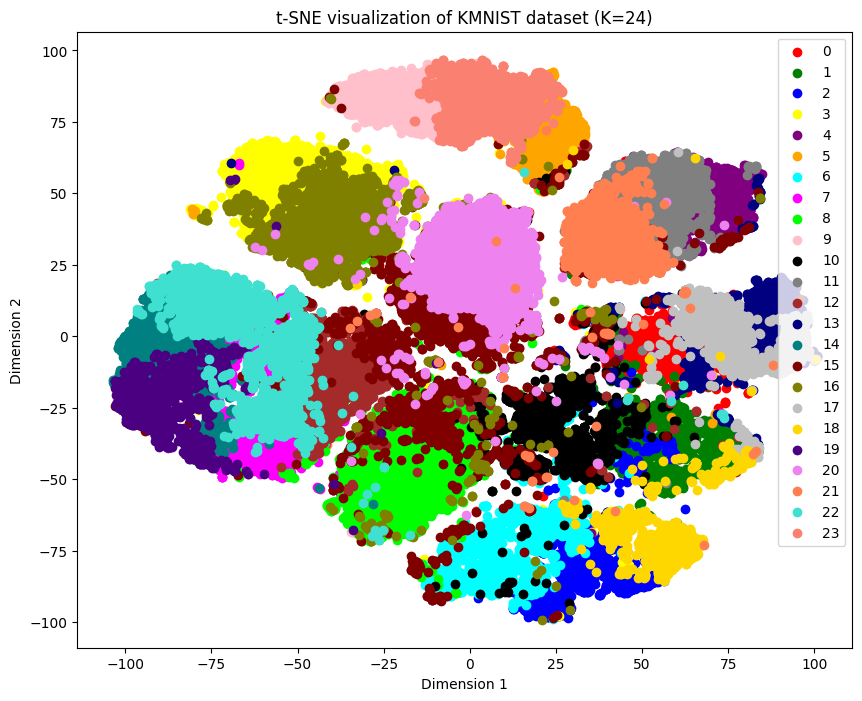

In [ ]:
# Map each label to a corresponding color
# colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'pink']
colors = get_colors(24)
labels = np.unique(y_pred_kmeans10)
label_to_color = dict(zip(labels, colors))
colors = [label_to_color[label] for label in y_pred_kmeans10]


# Plot the data points with color as the label
fig, ax = plt.subplots(figsize=(10, 8))
for label in labels:
    mask = (y_pred_kmeans10 == label)
    ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], c=label_to_color[label], label=label)

ax.legend(labels)
ax.set_title("t-SNE visualization of KMNIST dataset (K=24)")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
plt.show()

### Normalized mutual information

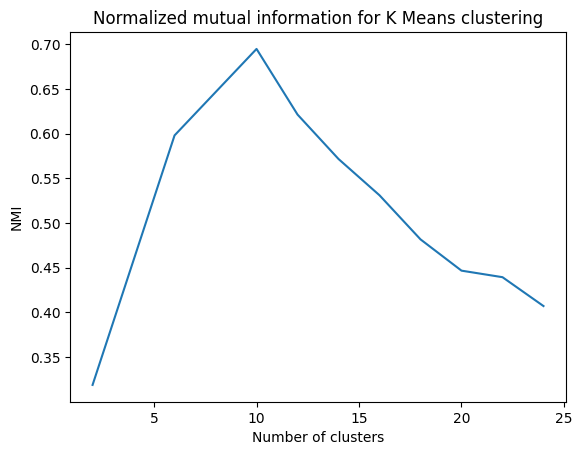

In [ ]:
K = np.array([2,6,10,12,14,16,18,20,22,24])
# Plot the x and y arrays
plt.plot(K, NMI_Kmeans)

# Add a title to the legend
plt.title('Normalized mutual information for K Means clustering')

# Add labels for the x and y axes
plt.xlabel('Number of clusters')
plt.ylabel('NMI')

# Display the plot
plt.show()

# QUESTION 5

In [ ]:
# Compute covariance matrix
cov_mat = np.cov(dataset[:,:-1].T)

# Compute eigenvalues and eigenvectors of covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Sort eigenvalues in descending order
sorted_idx = eig_vals.argsort()[::-1]
eig_vals = eig_vals[sorted_idx]
eig_vecs = eig_vecs[:, sorted_idx]

/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


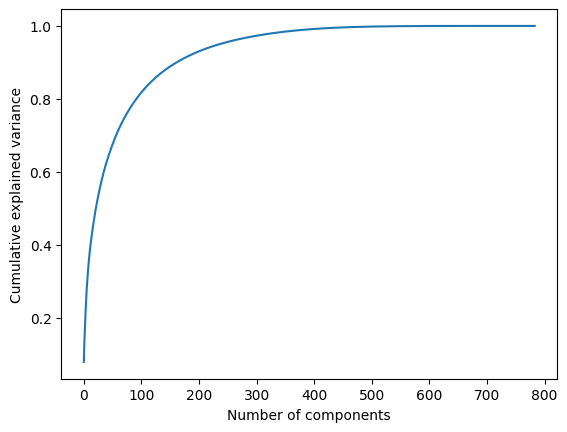

In [ ]:
# Compute cumulative sum of explained variance
cumulative_variance = np.cumsum(eig_vals) / np.sum(eig_vals)

# Plot explained variance as a function of number of principal components
plt.plot(cumulative_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:
threshold = 0.9
min_idx = np.searchsorted(cumulative_variance, threshold)

In [ ]:
X_pca = dataset[:,:-1].dot(eig_vecs[:,:min_idx+1])
print("X_pca i.e. projected data contains",threshold*100,"% variance of the total data and it has",min_idx,"dimensions")

X_pca i.e. projected data contains 90.0 % variance of the total data and it has 161 dimensions


In [ ]:
NMI

array([0.28280302, 0.52918366, 0.66598331, 0.62373374, 0.5899521 ,
       0.54580616, 0.44681823, 0.48795415, 0.43445242, 0.4211412 ])

In [ ]:
NMI_Kmeans

array([0.31899998, 0.59792984, 0.69459381, 0.62122284, 0.57154231,
       0.530979  , 0.48170631, 0.44673199, 0.43943137, 0.40716183])